# Diagnosis of COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('datasets/dataset.xlsx')

In [3]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [4]:
data.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

## I. Exploratory Data Analysis (EDA)
Objective: Understanding the available data as much as possible to define a modeling strategy.

### I.1 Form
- [x] Identifying the target variable :'SARS-Cov-2 exam result'
- [x] Number of rows and columns : 5644 rows and 111 columns
- [x] Identifying missing values : Many missing values, almost half the dataset > 90% NaN
- [x] Types of variables : 70 qualitative and 41 quantitative

However we can identify 2 groupes in our dataset. With a little search on internet we can distinguish :
- 76% : Viral Test
- 89% : Blood tests


In [5]:
# Create a coopy of the dataset
df=data.copy()

In [6]:
# Data dimensions
df.shape

(5644, 111)

In [7]:
# Types of variable
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [8]:
# Counting types
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

<Axes: >

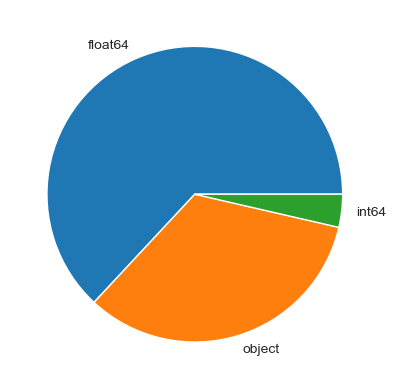

In [9]:
df.dtypes.value_counts().plot.pie()

In order to identify the missing values, I'll try to display the entire dataset by cconverting it into an image


In [10]:
# Displaying NAN (boolean) output
df.isna()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0           True       True                   True  ...   
1          False      False                  False  ...   
2           True       True                   True  ...   
3           True       True                   True  ...   
4           True       True                   True  ...   
...          ...        ...                    ...  ...   
5639        True       True                   True  ...   
5640        True       True                   True  ...   
5641        True       True                   True  ...   
5642        True       True                   True  ...   
5643       False      False                  False  ...   

      Hb saturation (arterial blood gases)  \
0                                     True   
1                                     True   
2                                  

<Axes: >

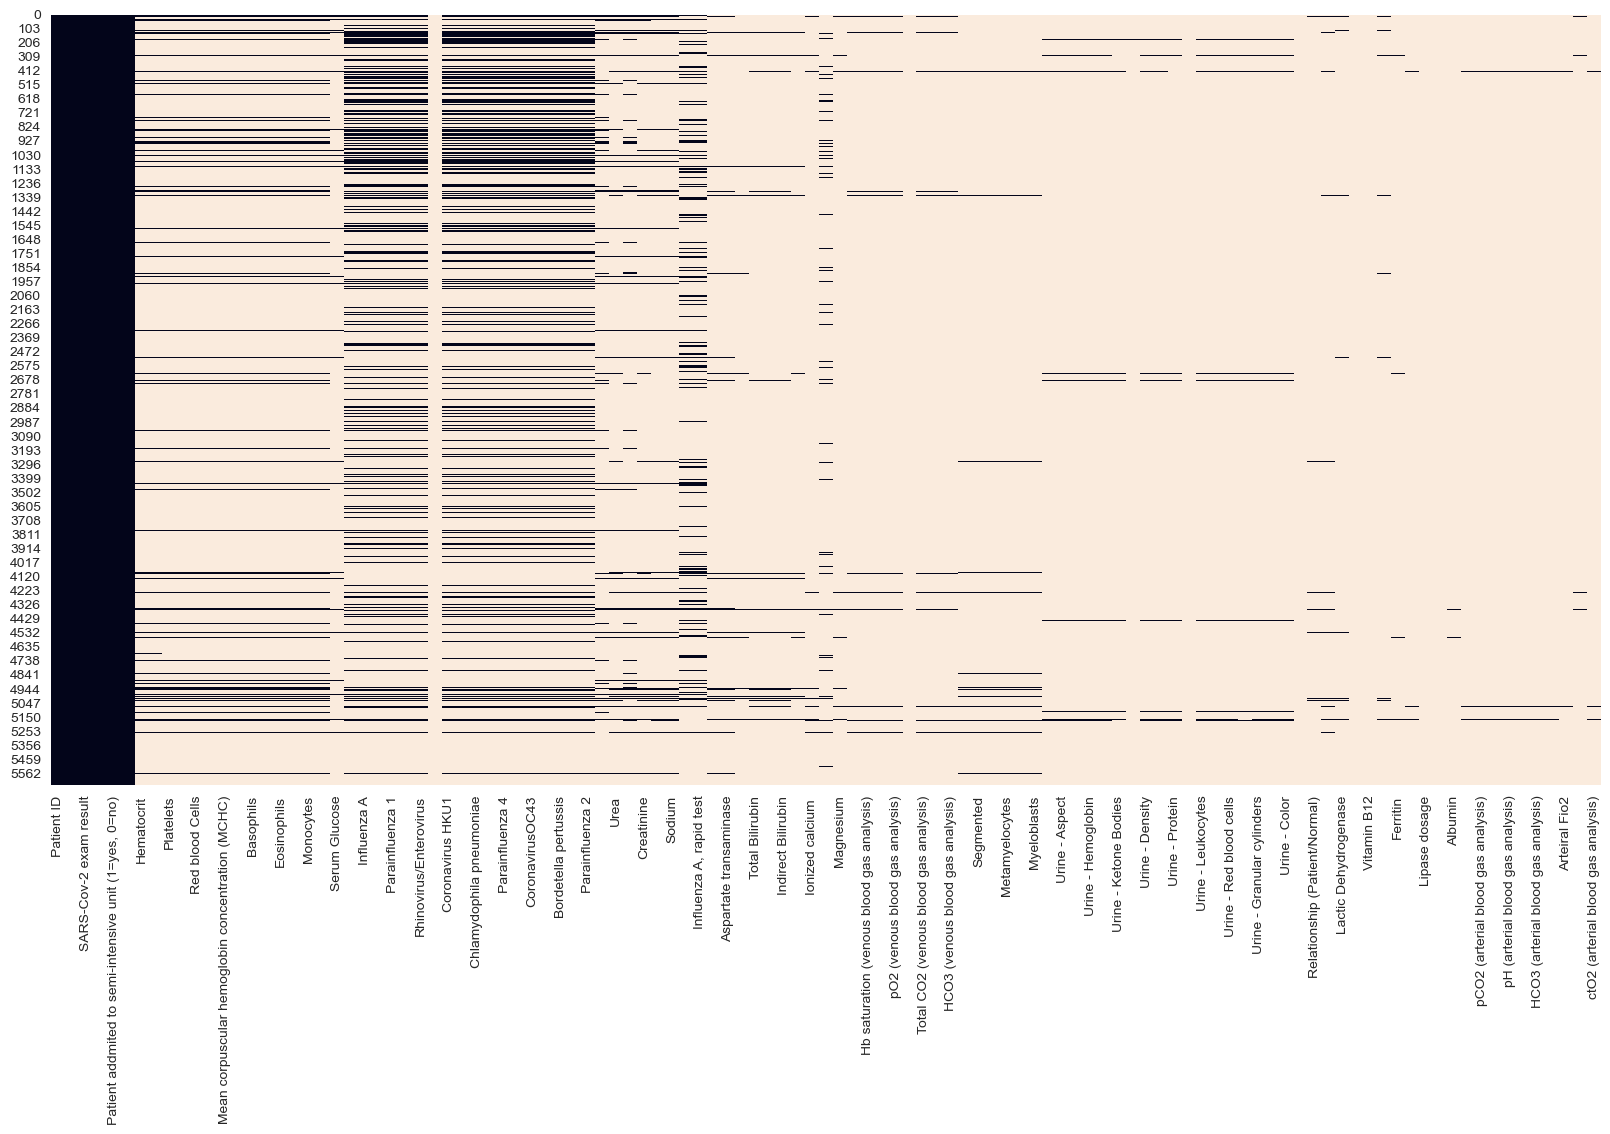

In [11]:
# Using seaborn's heat map
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [12]:
# Missing values percentage
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 111, dtype: float64


### I.2 Content
- [x] Visualizing the target variable (histogram/box plot) :
- [x] Understanding different variables (research)
     - 10% positiv cases
     - Standardized continuous variables with skewed (asymmetric) blood test results.
     - Age quantile : Hard to interprete | Not enough information
     - **Categorical variable** : binary (0|1), Viral, Rhinovirus seem high
- [x] Visualizing relationships: features/target
     - target / Blood : Monocytes, Platelets, Leukocyte may be related to covid (hyp)
     - target / age : It seems like kids below 2 may not get covid, however we still don't know what does the age quantile mean
     - target / viral : having a double virus is pretty rare, however does having Rhinovirus means not having Covid?
- [ ] Identifying outliers


In [13]:
# Removing unecessary columns
df=df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

In [14]:
df.shape

(5644, 39)

<Axes: >

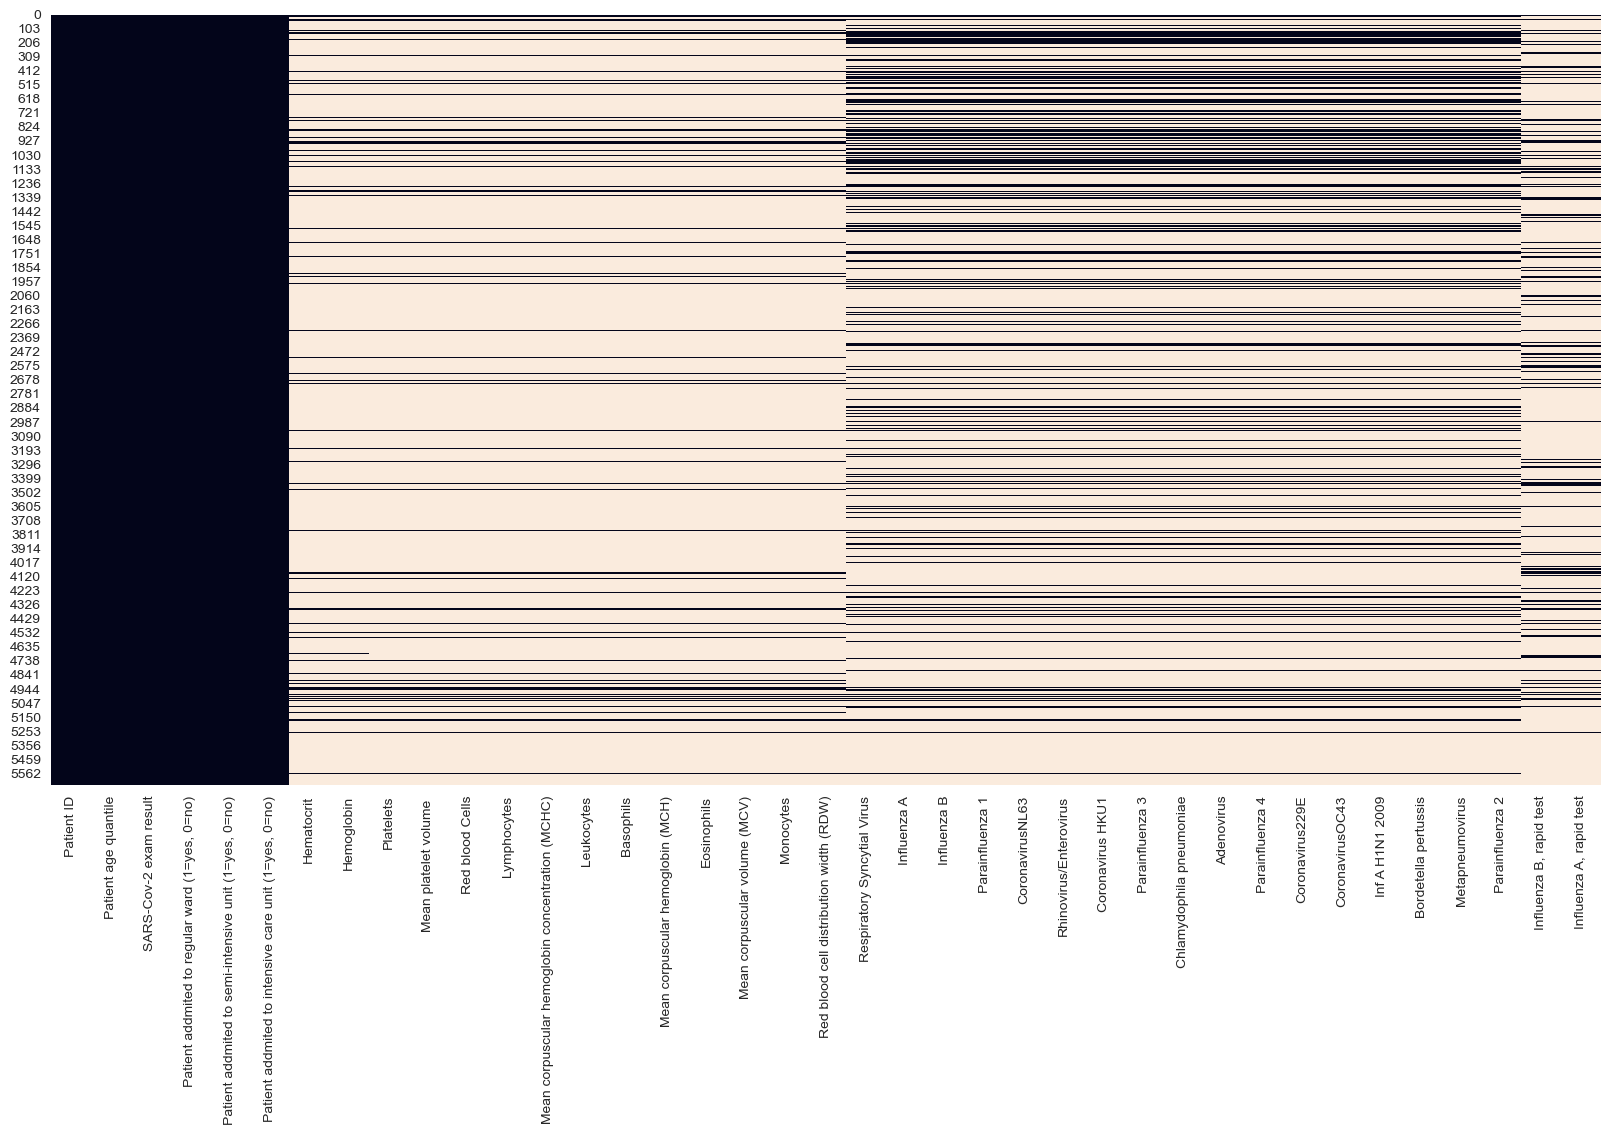

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [16]:
# There's one moore column to eliminate : Patient ID cause we actually do not need it
df=df.drop('Patient ID',axis=1)

In [17]:
df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0            NaN        NaN                    NaN              NaN  ...   
1      -0.022340  -0.517413               0.010677         0.102004  ...   
2            NaN        NaN                    NaN              NaN  ...   
3            NaN        NaN                    NaN              NaN  ...   
4            NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5640         NaN        NaN                    NaN              NaN  ...   
5641         NaN        NaN                    NaN              NaN  ...   
5642         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
0              NaN              NaN              NaN

In [18]:
# Examine target column
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

#### Continuous values

C:\Users\aitay\AppData\Local\Temp\ipykernel_33684\2994319955.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

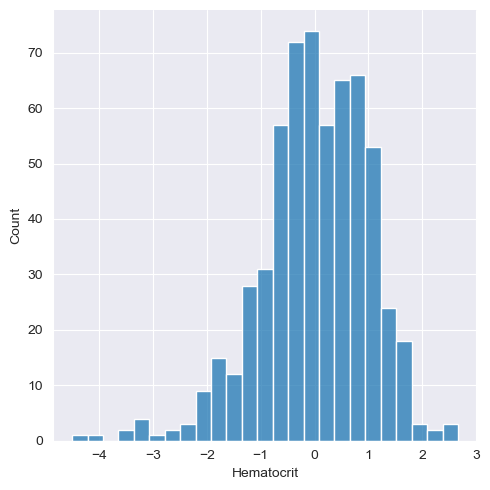

<Figure size 640x480 with 0 Axes>

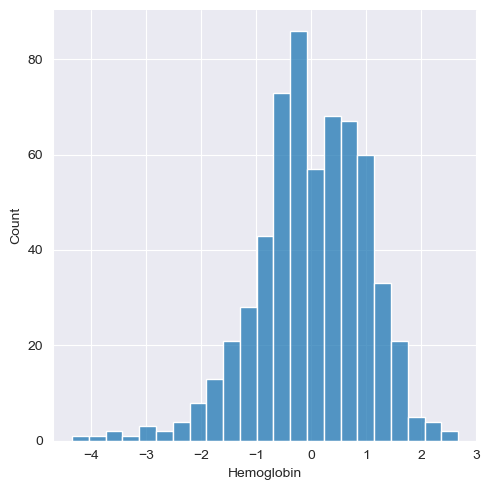

<Figure size 640x480 with 0 Axes>

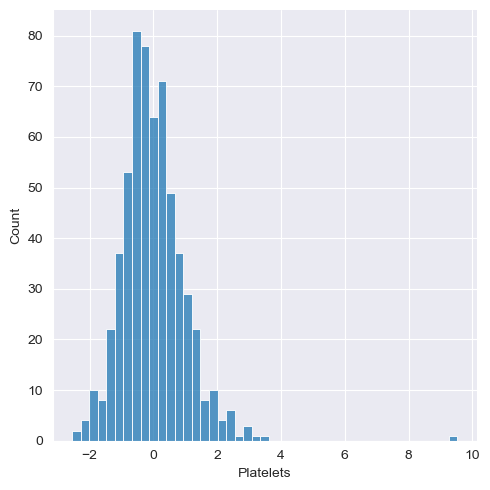

<Figure size 640x480 with 0 Axes>

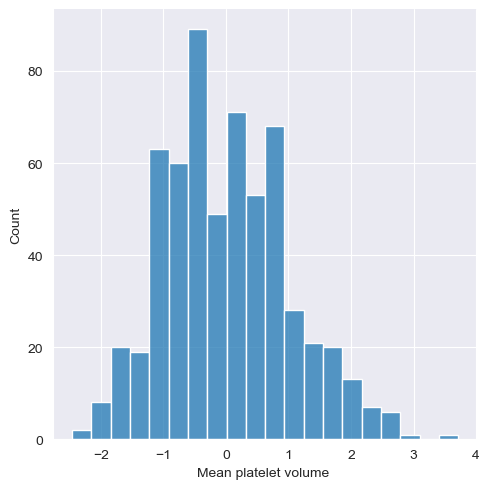

<Figure size 640x480 with 0 Axes>

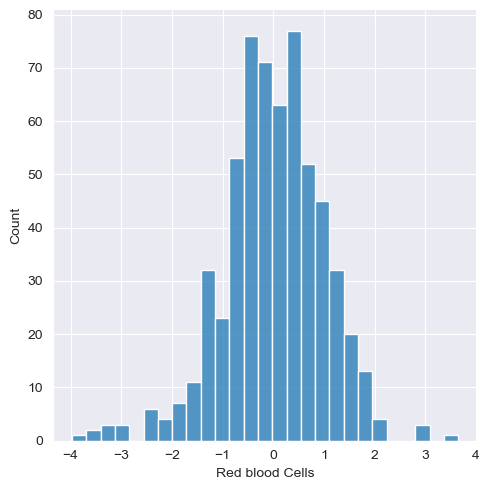

<Figure size 640x480 with 0 Axes>

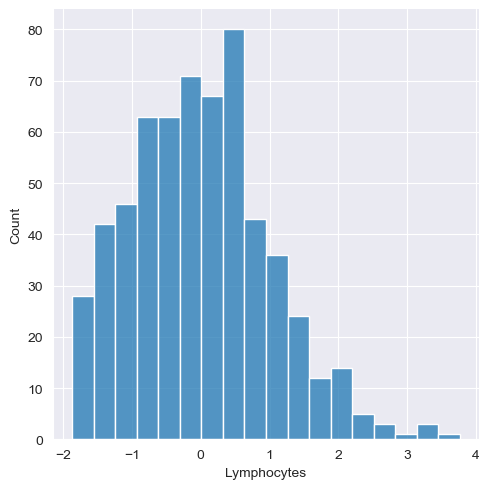

<Figure size 640x480 with 0 Axes>

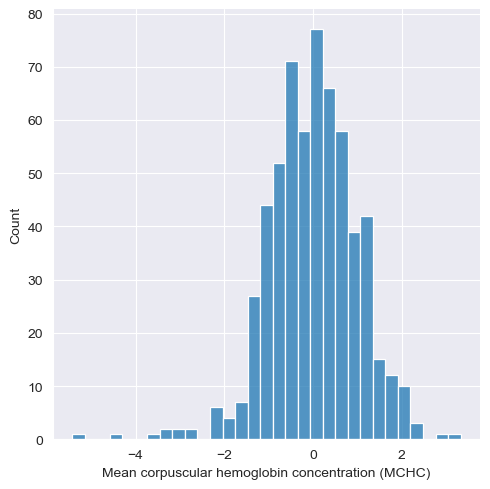

<Figure size 640x480 with 0 Axes>

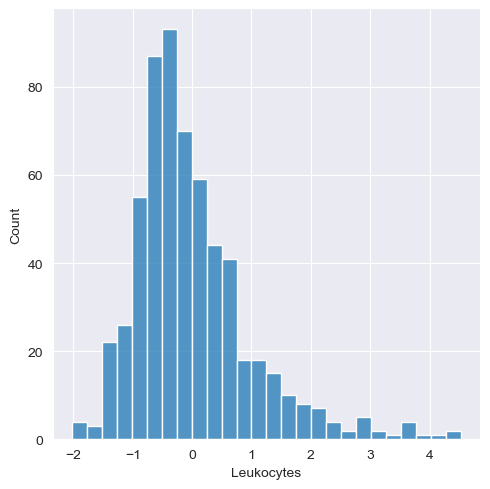

<Figure size 640x480 with 0 Axes>

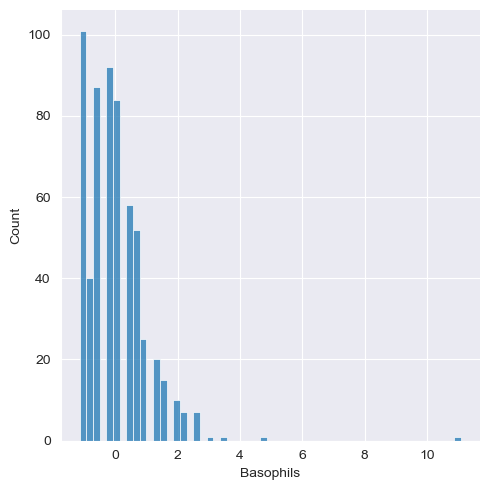

<Figure size 640x480 with 0 Axes>

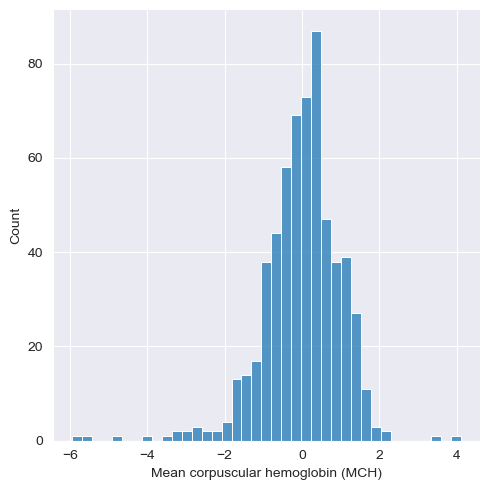

<Figure size 640x480 with 0 Axes>

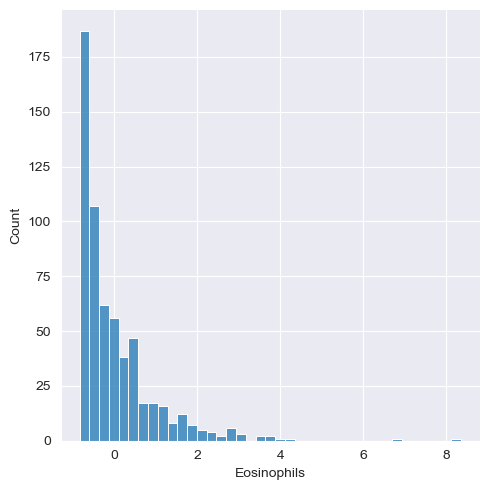

<Figure size 640x480 with 0 Axes>

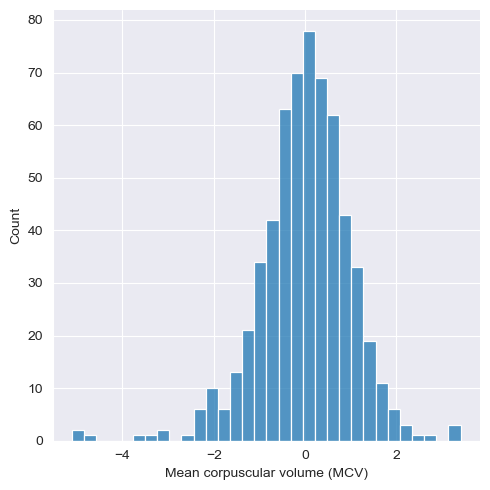

<Figure size 640x480 with 0 Axes>

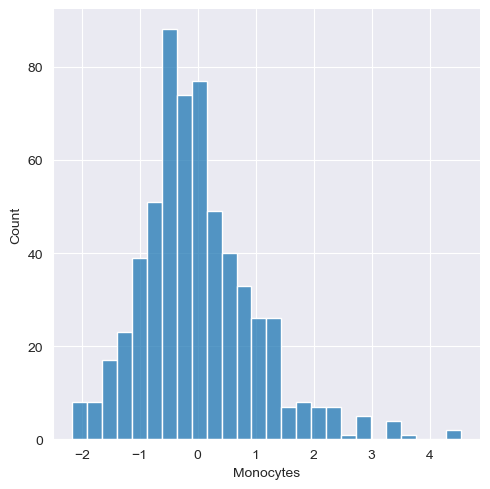

<Figure size 640x480 with 0 Axes>

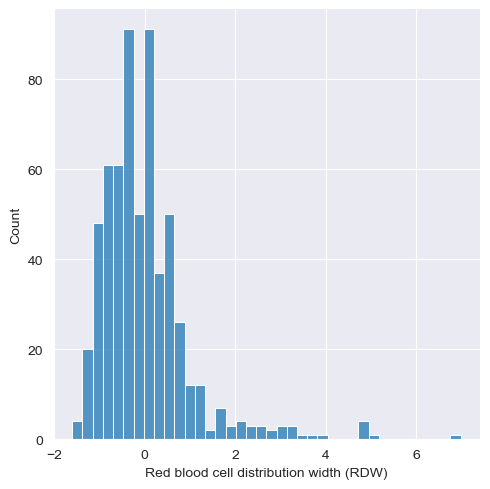

In [19]:
# Histogram of continuous values
for col in df.select_dtypes(include='float'):
    plt.figure()
    sns.displot(df[col])

Remarks:
- All our variables are centered around 0 and appear to have a standard deviation (écart-type) of 1.
Meaning: These data have been standardized.
- Some variables follow a normal distribution.

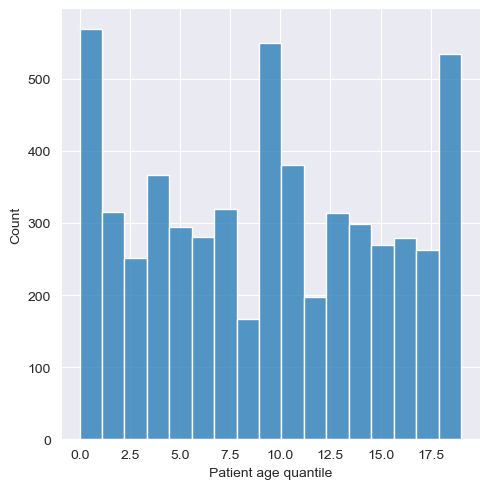

In [20]:
sns.displot(df['Patient age quantile'])

#### Categories

In [21]:
# Showing categories
for col in df.select_dtypes(include='object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

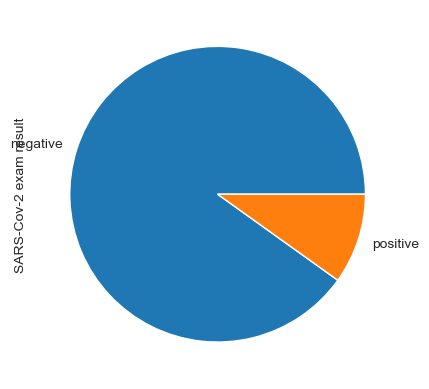

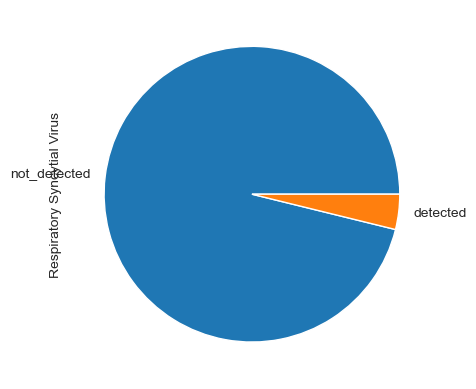

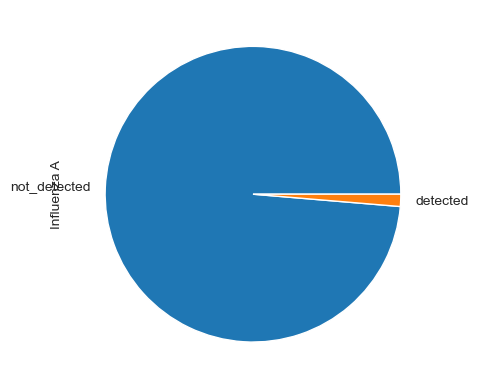

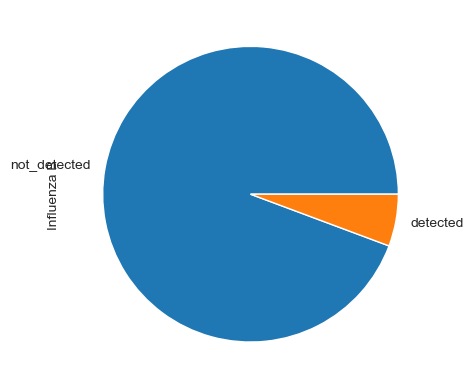

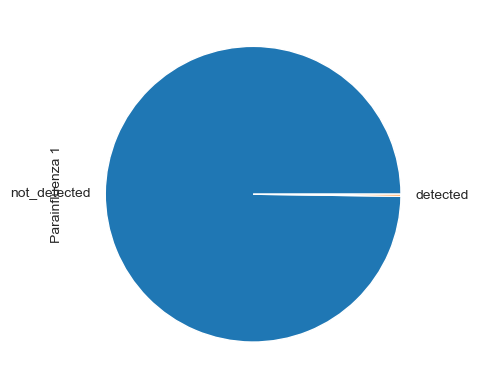

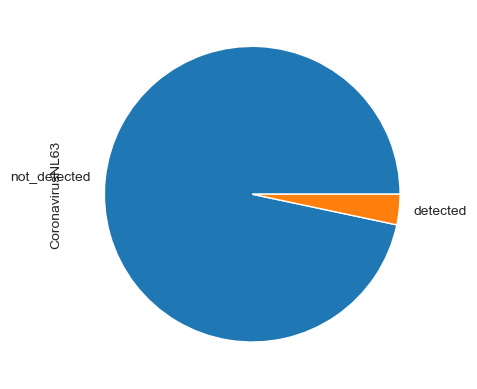

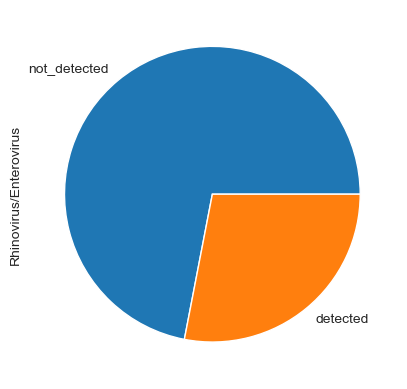

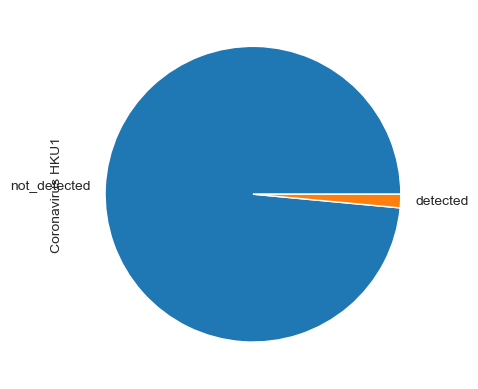

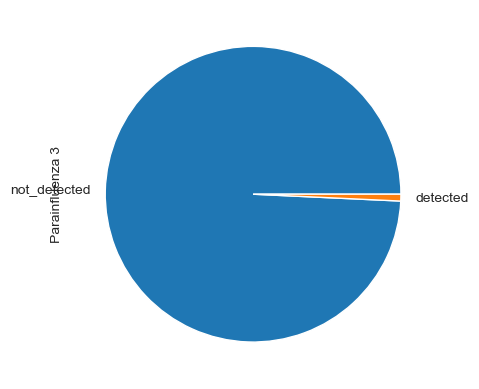

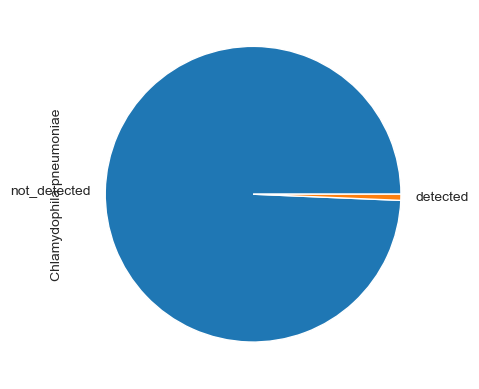

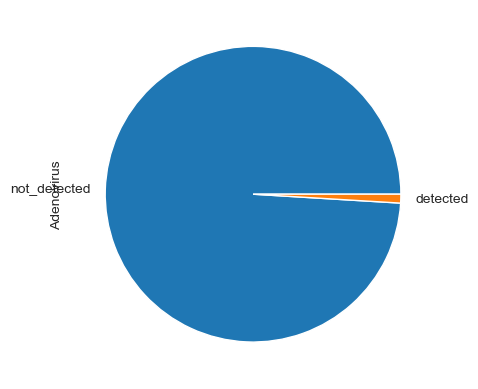

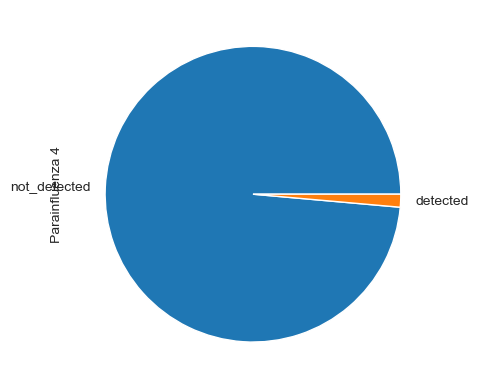

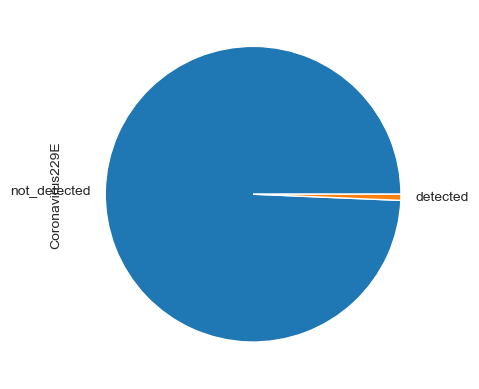

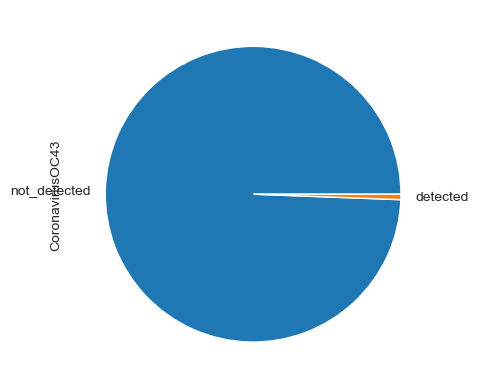

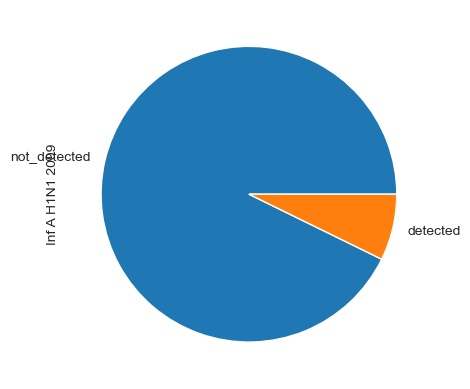

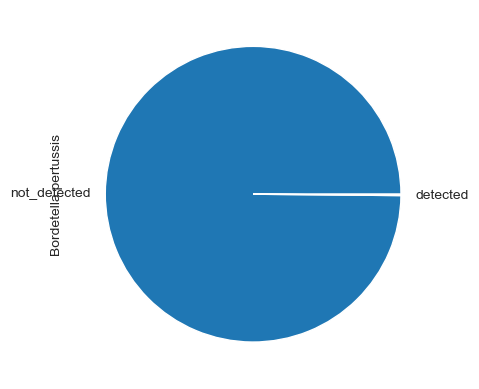

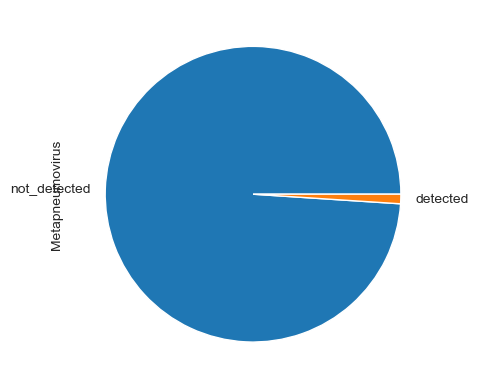

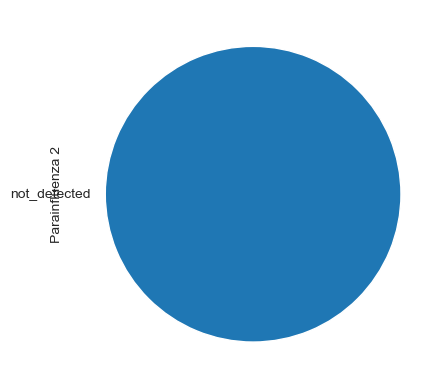

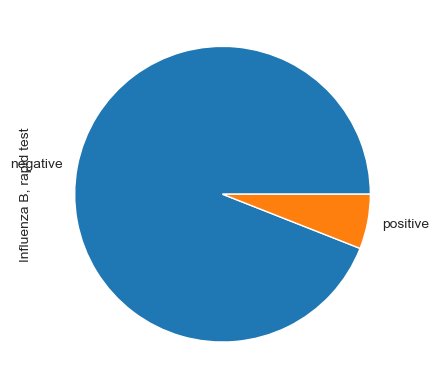

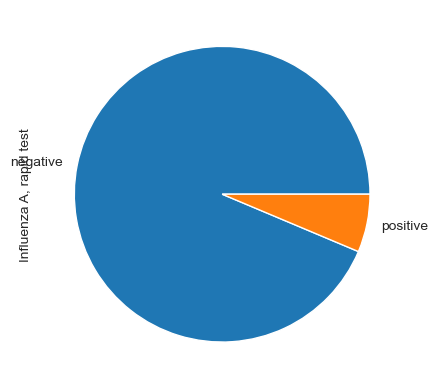

In [22]:
for col in df.select_dtypes(include='object'):
    plt.figure()
    df[col].value_counts().plot.pie()

#### Visualizing relationships: features/target

##### Sub-categories positives and negatives

In [23]:
positive_df=df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df=df[df['SARS-Cov-2 exam result'] == 'negative']

##### Sub-categories Blood and Viral

In [24]:
missing_rate = df.isna().sum()/df.shape[0]

In [25]:
blood_columns=df.columns[(missing_rate < 0.9)&(missing_rate > 0.88)]

In [26]:
viral_column=df.columns[(missing_rate < 0.88)&(missing_rate > 0.75)]
positive_df

Patient age quantile SARS-Cov-2 exam result  \
67                       7               positive   
284                     16               positive   
513                     10               positive   
568                      2               positive   
676                     15               positive   
...                    ...                    ...   
5632                    16               positive   
5633                     4               positive   
5634                    15               positive   
5639                     3               positive   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
67           NaN        NaN                    NaN              NaN  ...   
284          NaN        NaN                    NaN              NaN  ...   
513          NaN        NaN                    NaN              NaN  ...   
568     0.792188  -0.341548               1.469188         1.653476  ...   
676          NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5632         NaN        NaN                    NaN              NaN  ...   
5633         NaN        NaN                    NaN              NaN  ...   
5634         NaN        NaN                    NaN              NaN  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
67             NaN              NaN              NaN

##### Target/Blood

C:\Users\aitay\AppData\Local\Temp\ipykernel_33684\1128955904.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='positive', color='red', kde=True)
C:\Users\aitay\AppData\Local\Temp\ipykernel_33684\1128955904.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[

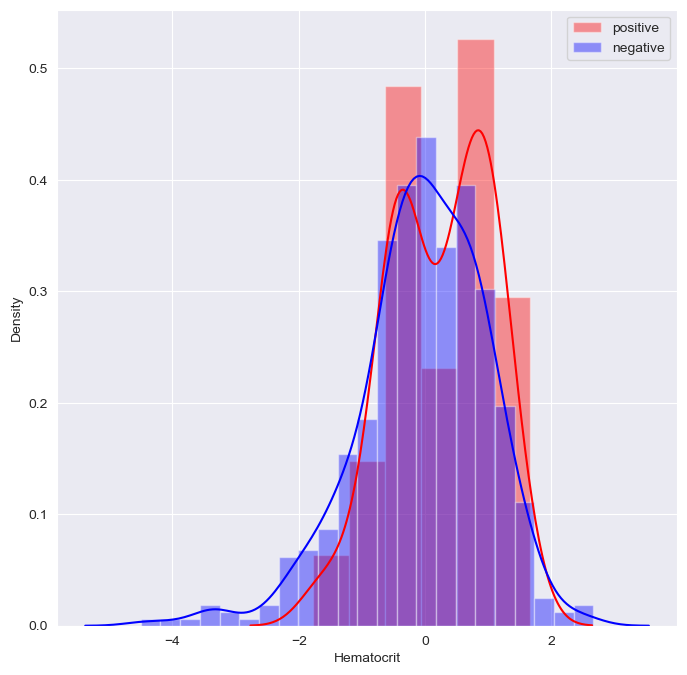

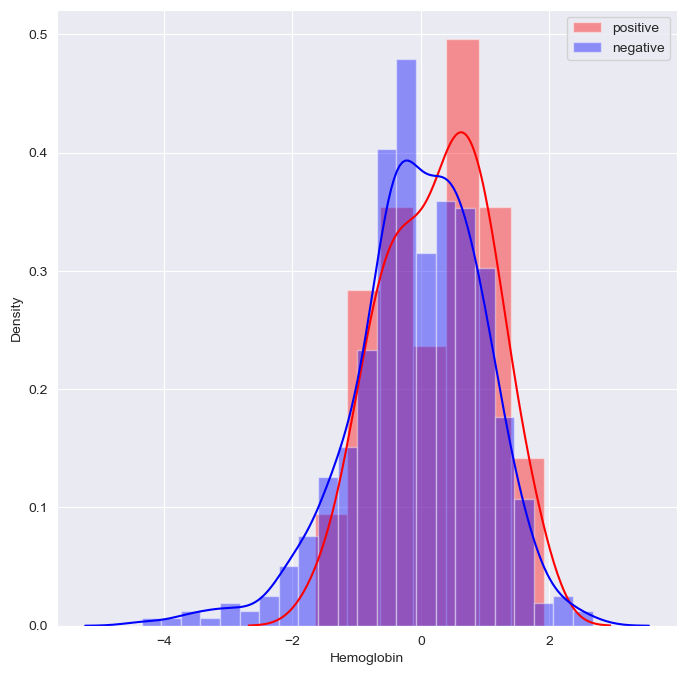

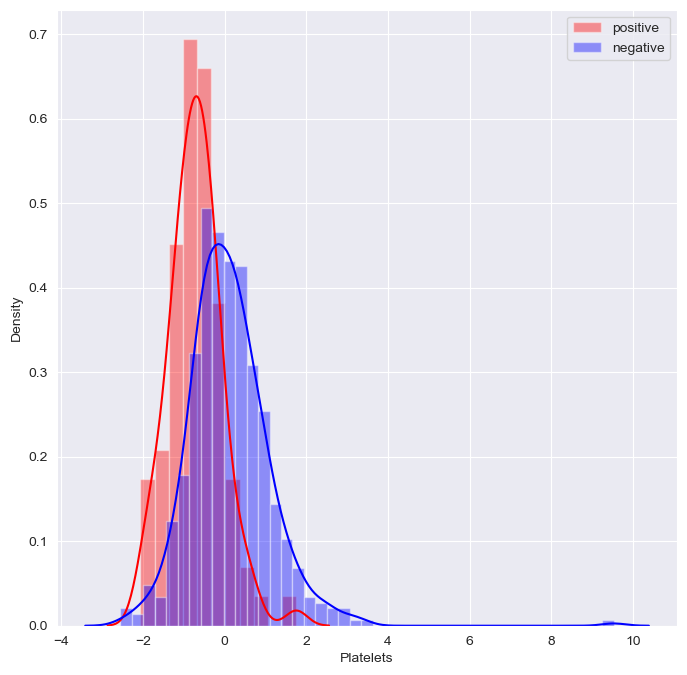

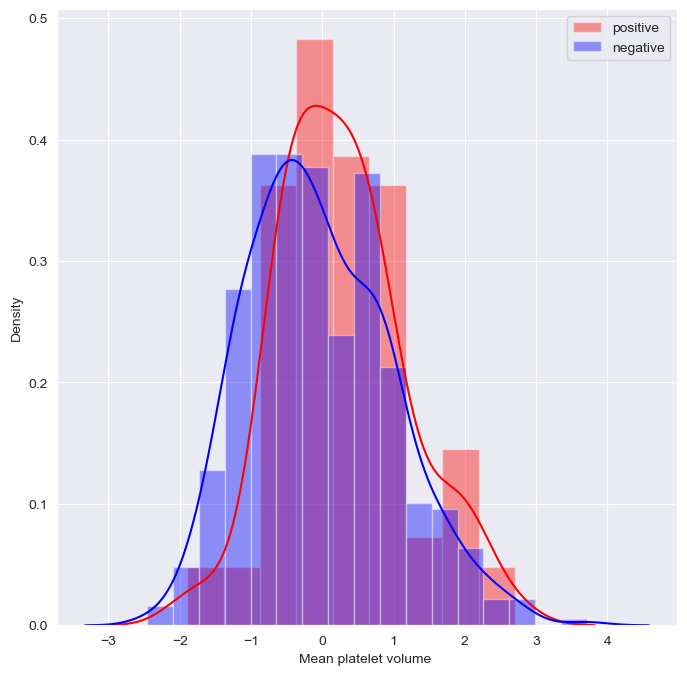

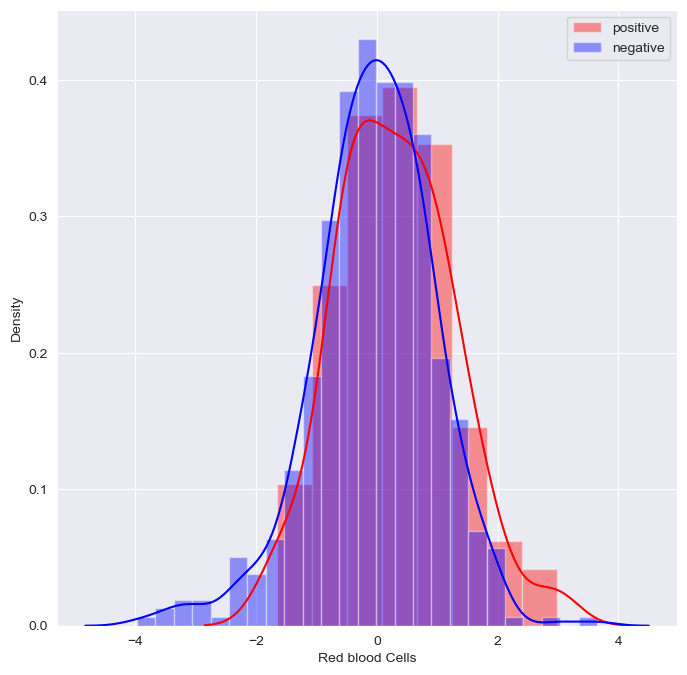

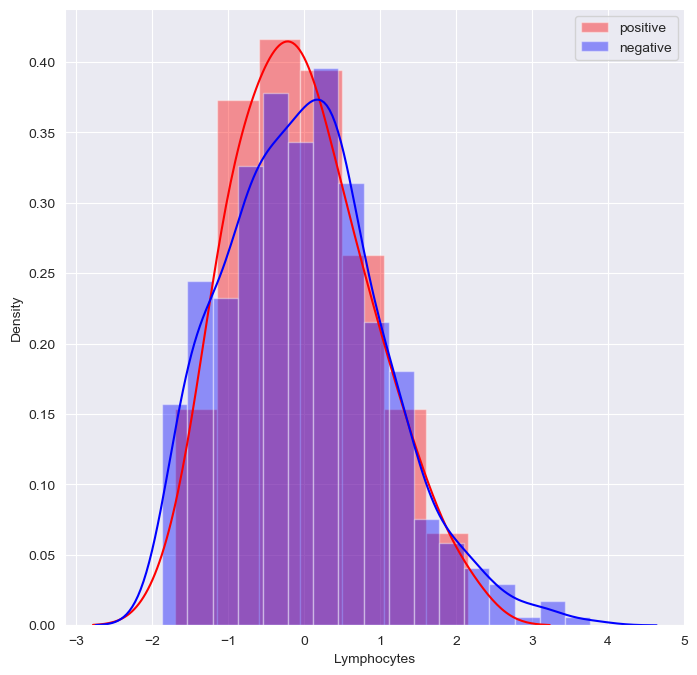

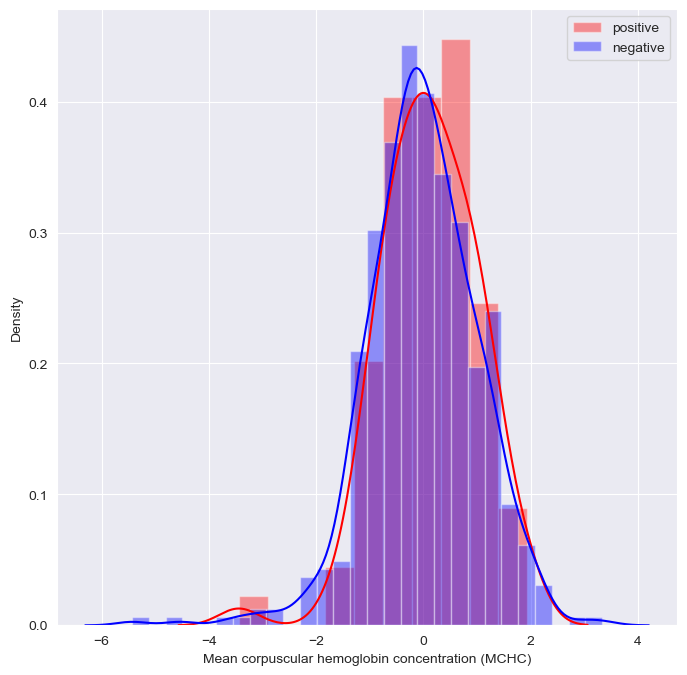

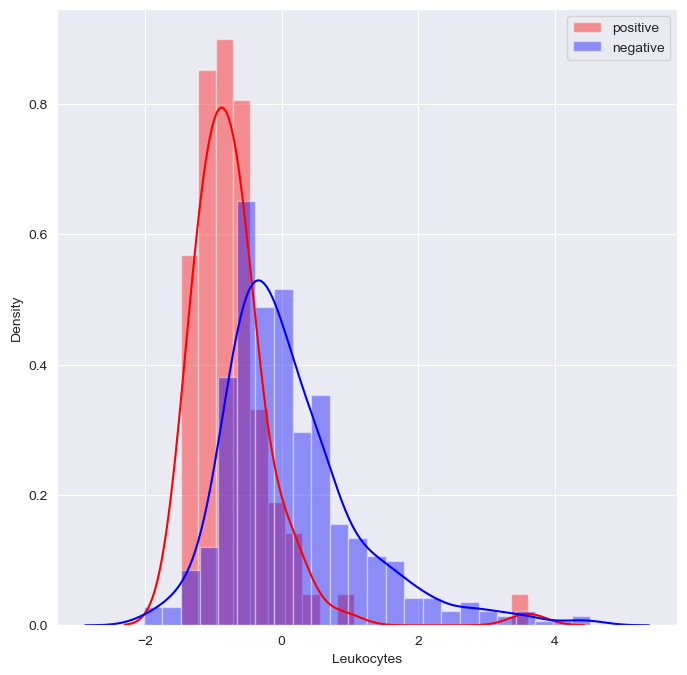

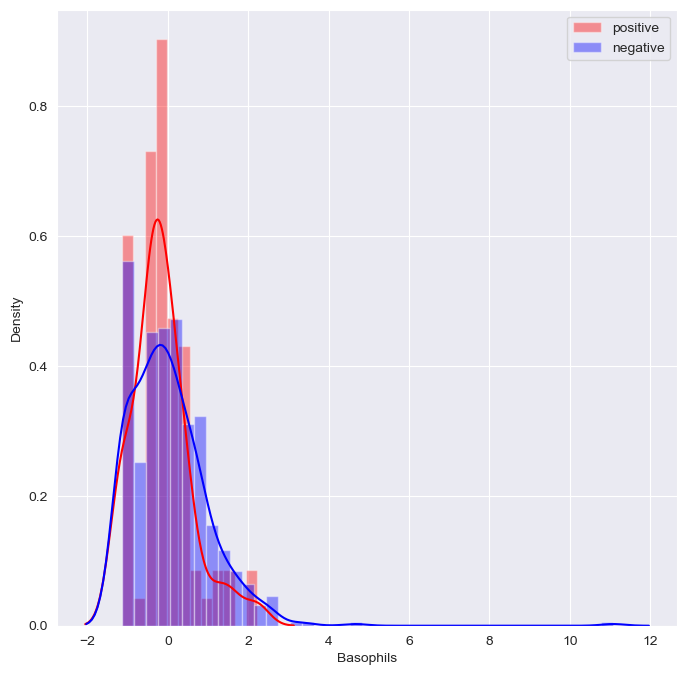

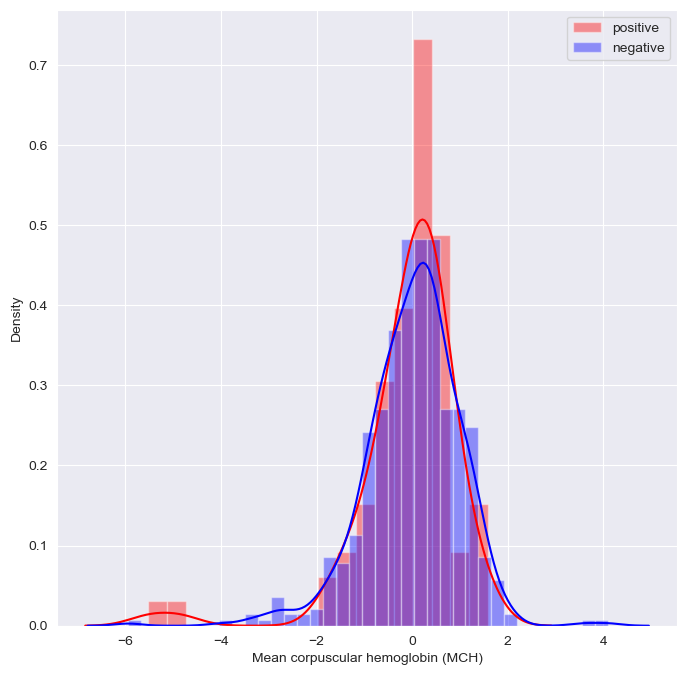

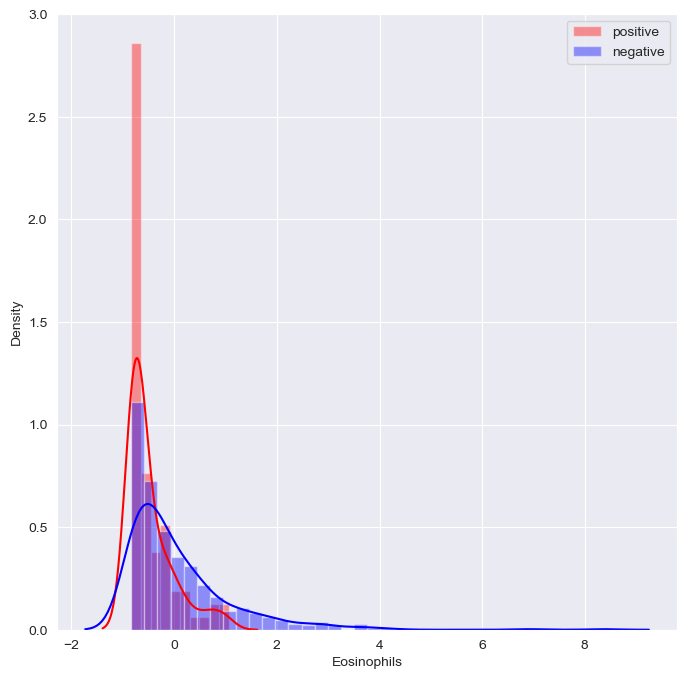

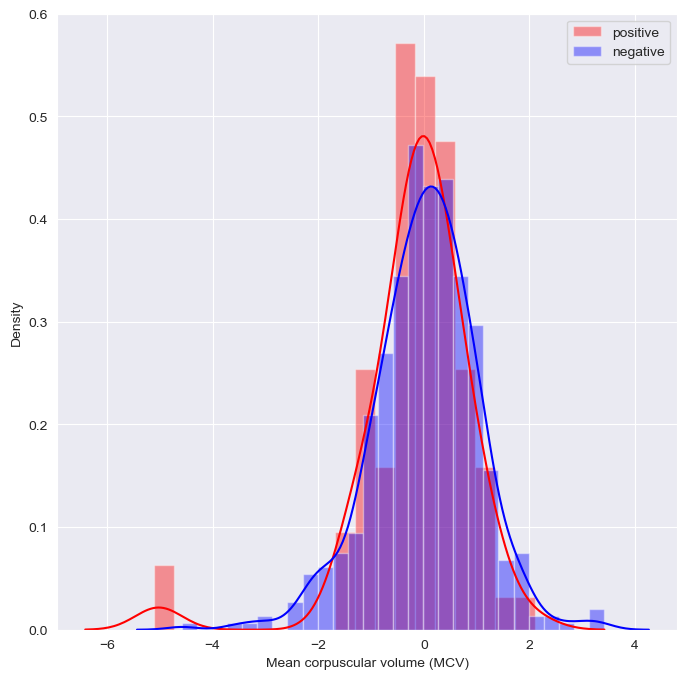

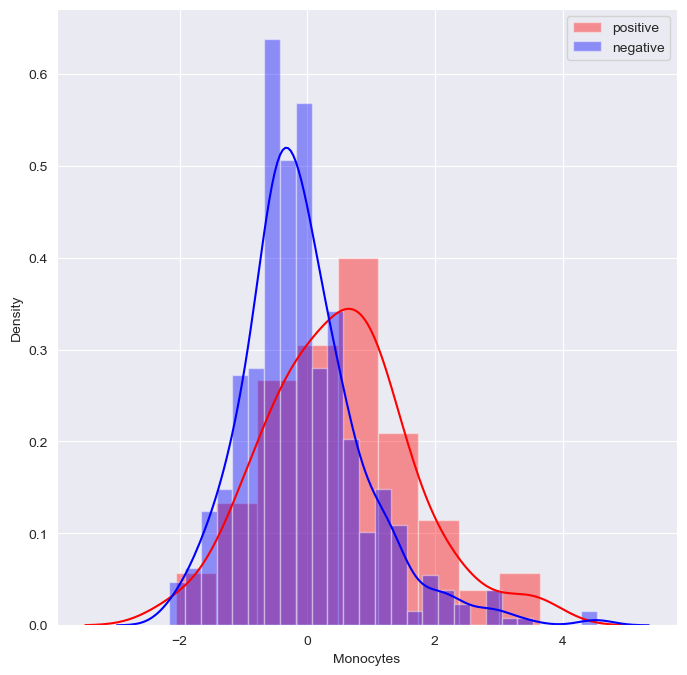

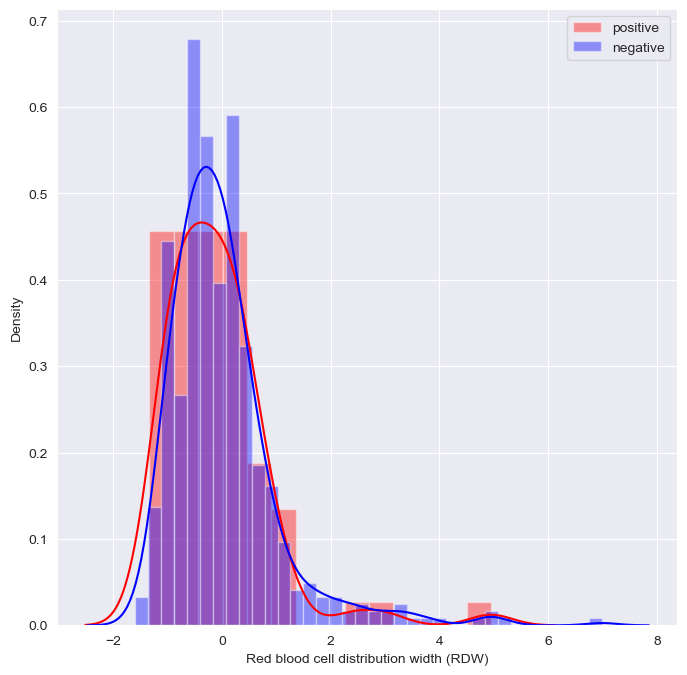

In [27]:
for col in blood_columns:
    plt.figure(figsize=(8,8))
    sns.distplot(positive_df[col],label='positive', color='red', kde=True)
    sns.distplot(negative_df[col],label='negative',color='blue',kde=True)
    plt.legend()
plt.show()

##### Target / Age

<Axes: xlabel='Patient age quantile', ylabel='count'>

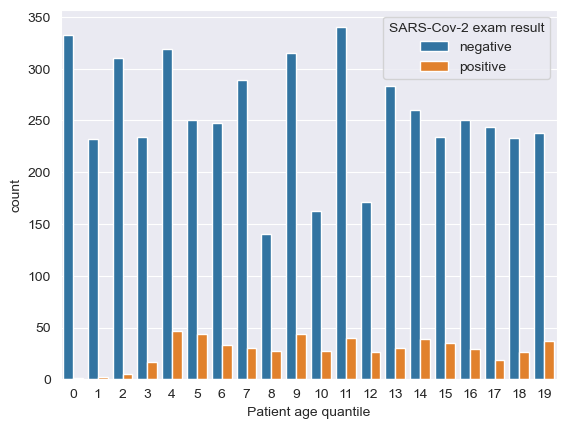

In [28]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result', data=df)

##### Target / Viral

In [29]:
# Cross tab : Used to compare categories
pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

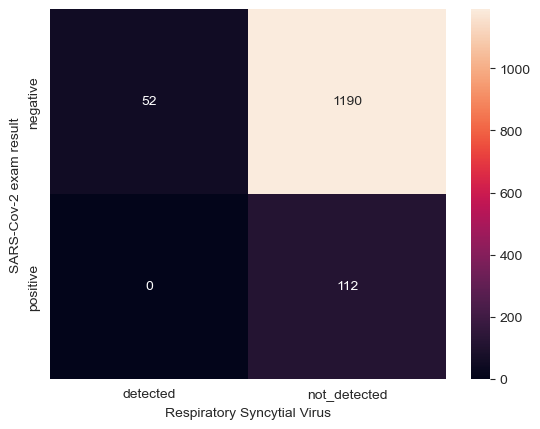

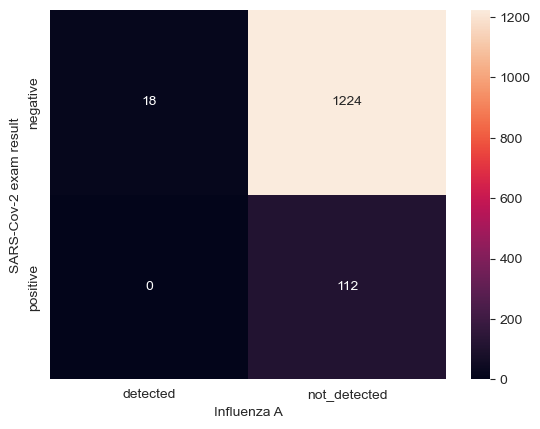

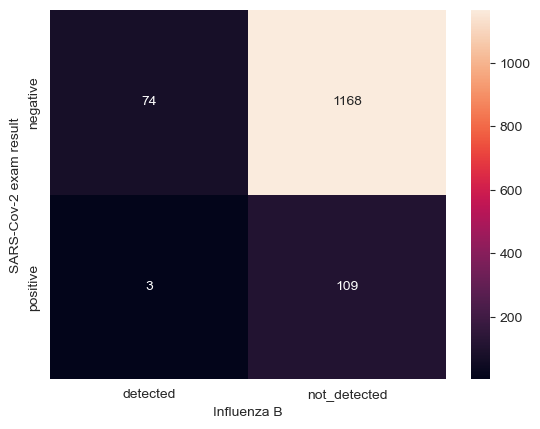

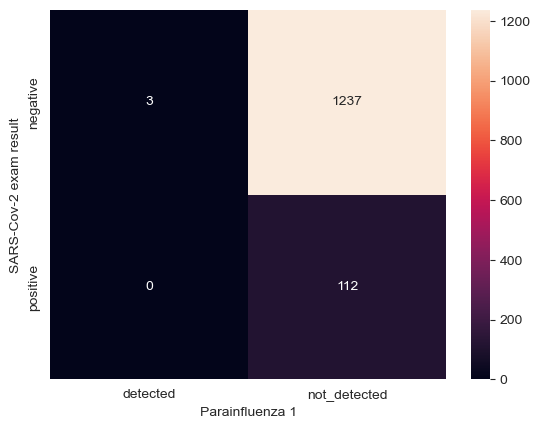

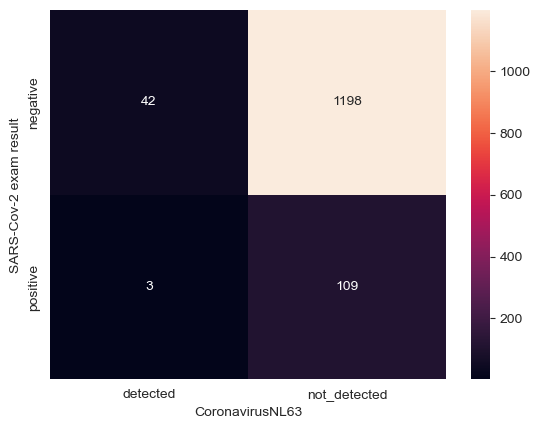

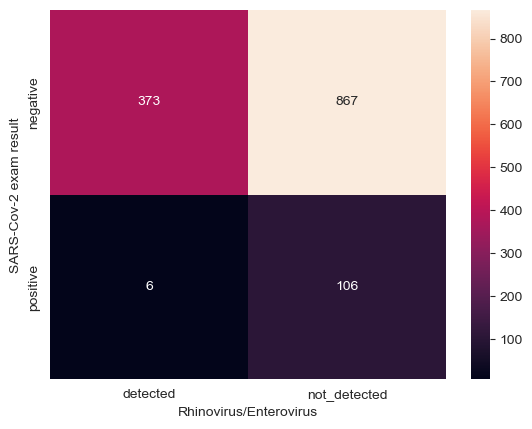

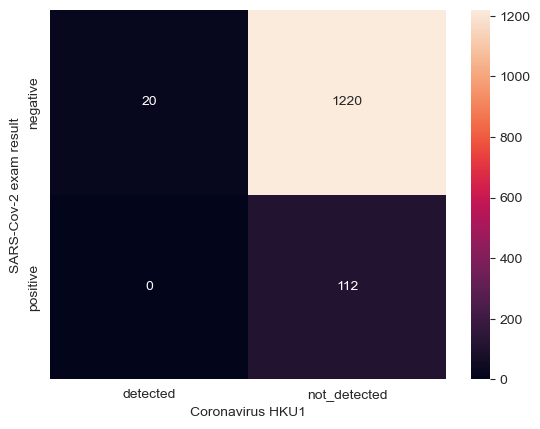

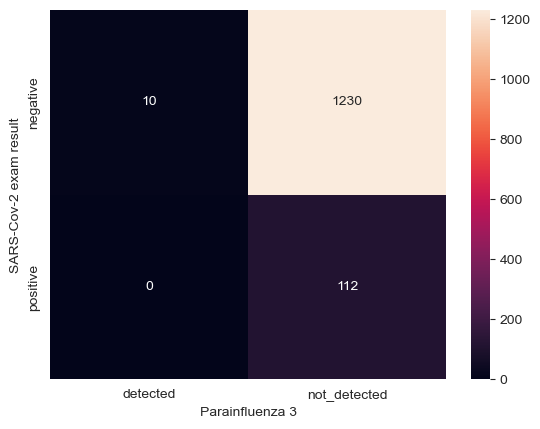

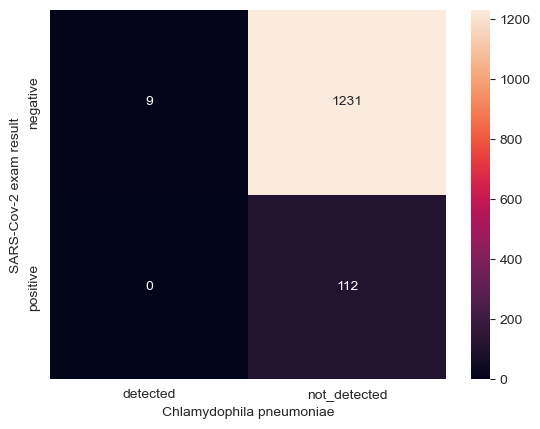

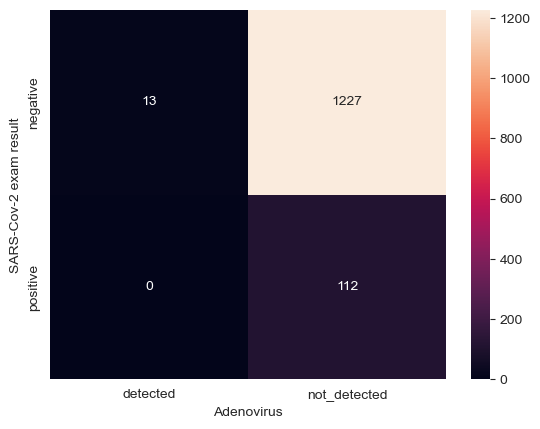

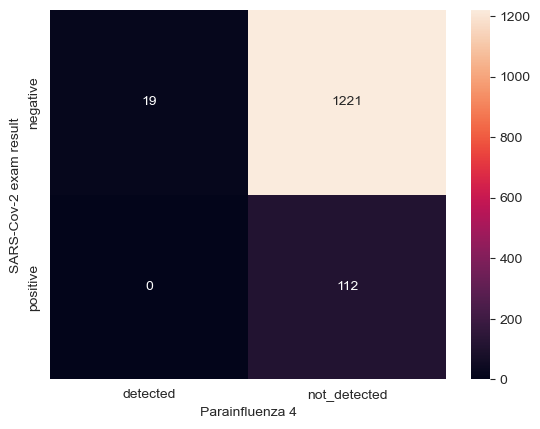

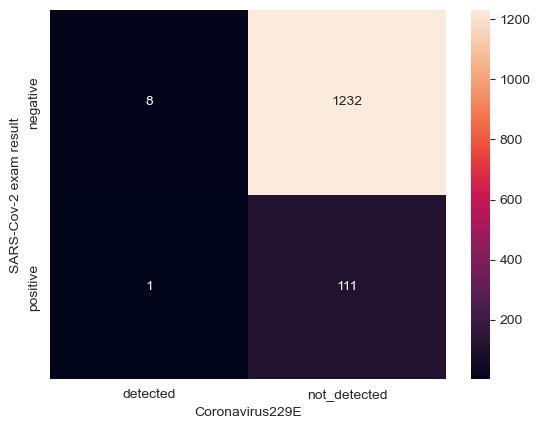

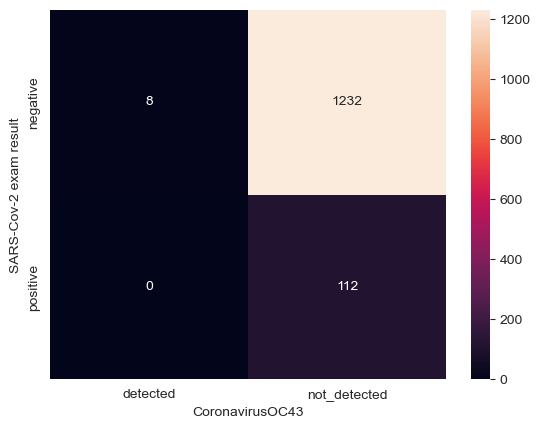

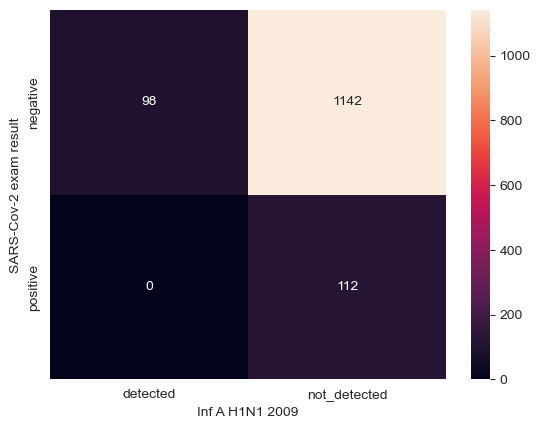

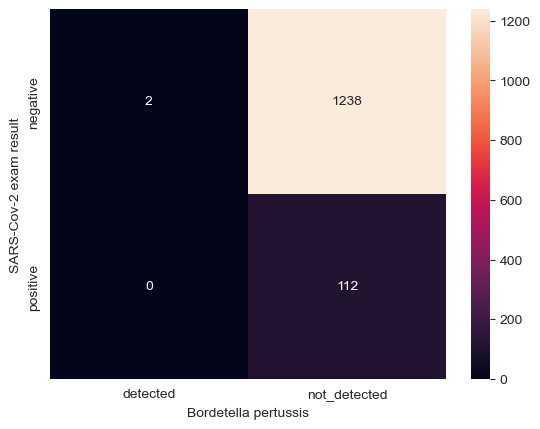

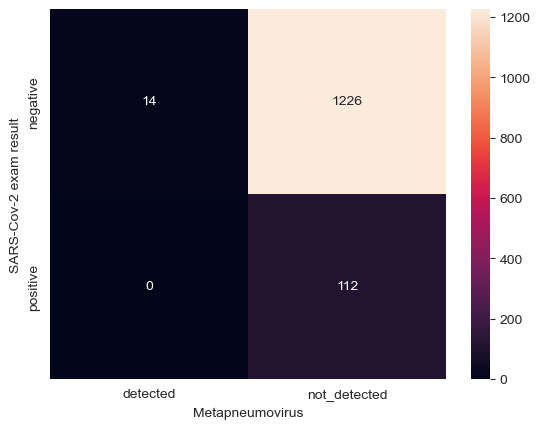

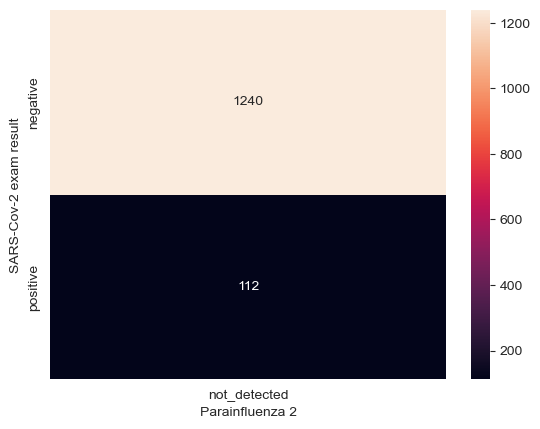

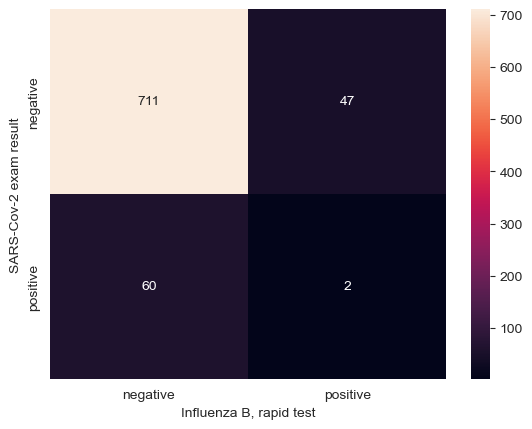

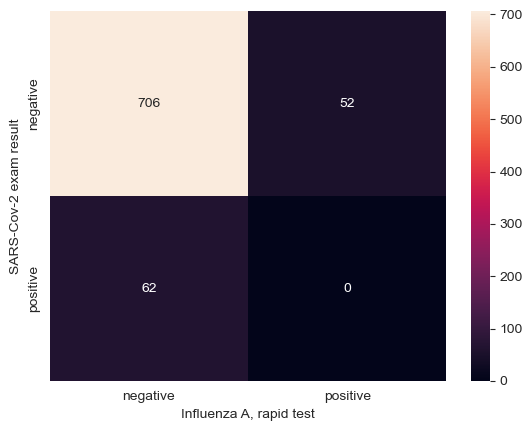

In [30]:
for col in viral_column:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d')

### More in depth analysis

> **Variables relationship**
> - blood_data/blood_data : Some features are HIGHLY related (+90%)
> - blood_data/age : very low relationship
> - viral/viral:
>       - Influenza rapid test gives really bad results
> - sickness/blood_data :
>       - blood data between a sick person and a person having covid are different
> - hospitalized/blood_data : We can identify the right service for each patient using this relationship
> - hospitalised/sickness
>
> **NaN analysis**
> viral : 1350 (92/9)
> blood : 600 (87/13)
> both  : 90

**Null hypothesis (H0):**
- Patients positive of COVID19 have a different amount of Leukocytes, Monocytes, Platelets
    - H0 = Positive and negative patients HAVE THE SAME amount of Leukocytes, Monocytes, Platelets | H0 rejected
- Patients having any form of virus have different amounts
    - H0 = Patients having any form of virus HAVE THE SAME amount of Leukocytes, Monocytes, Platelets





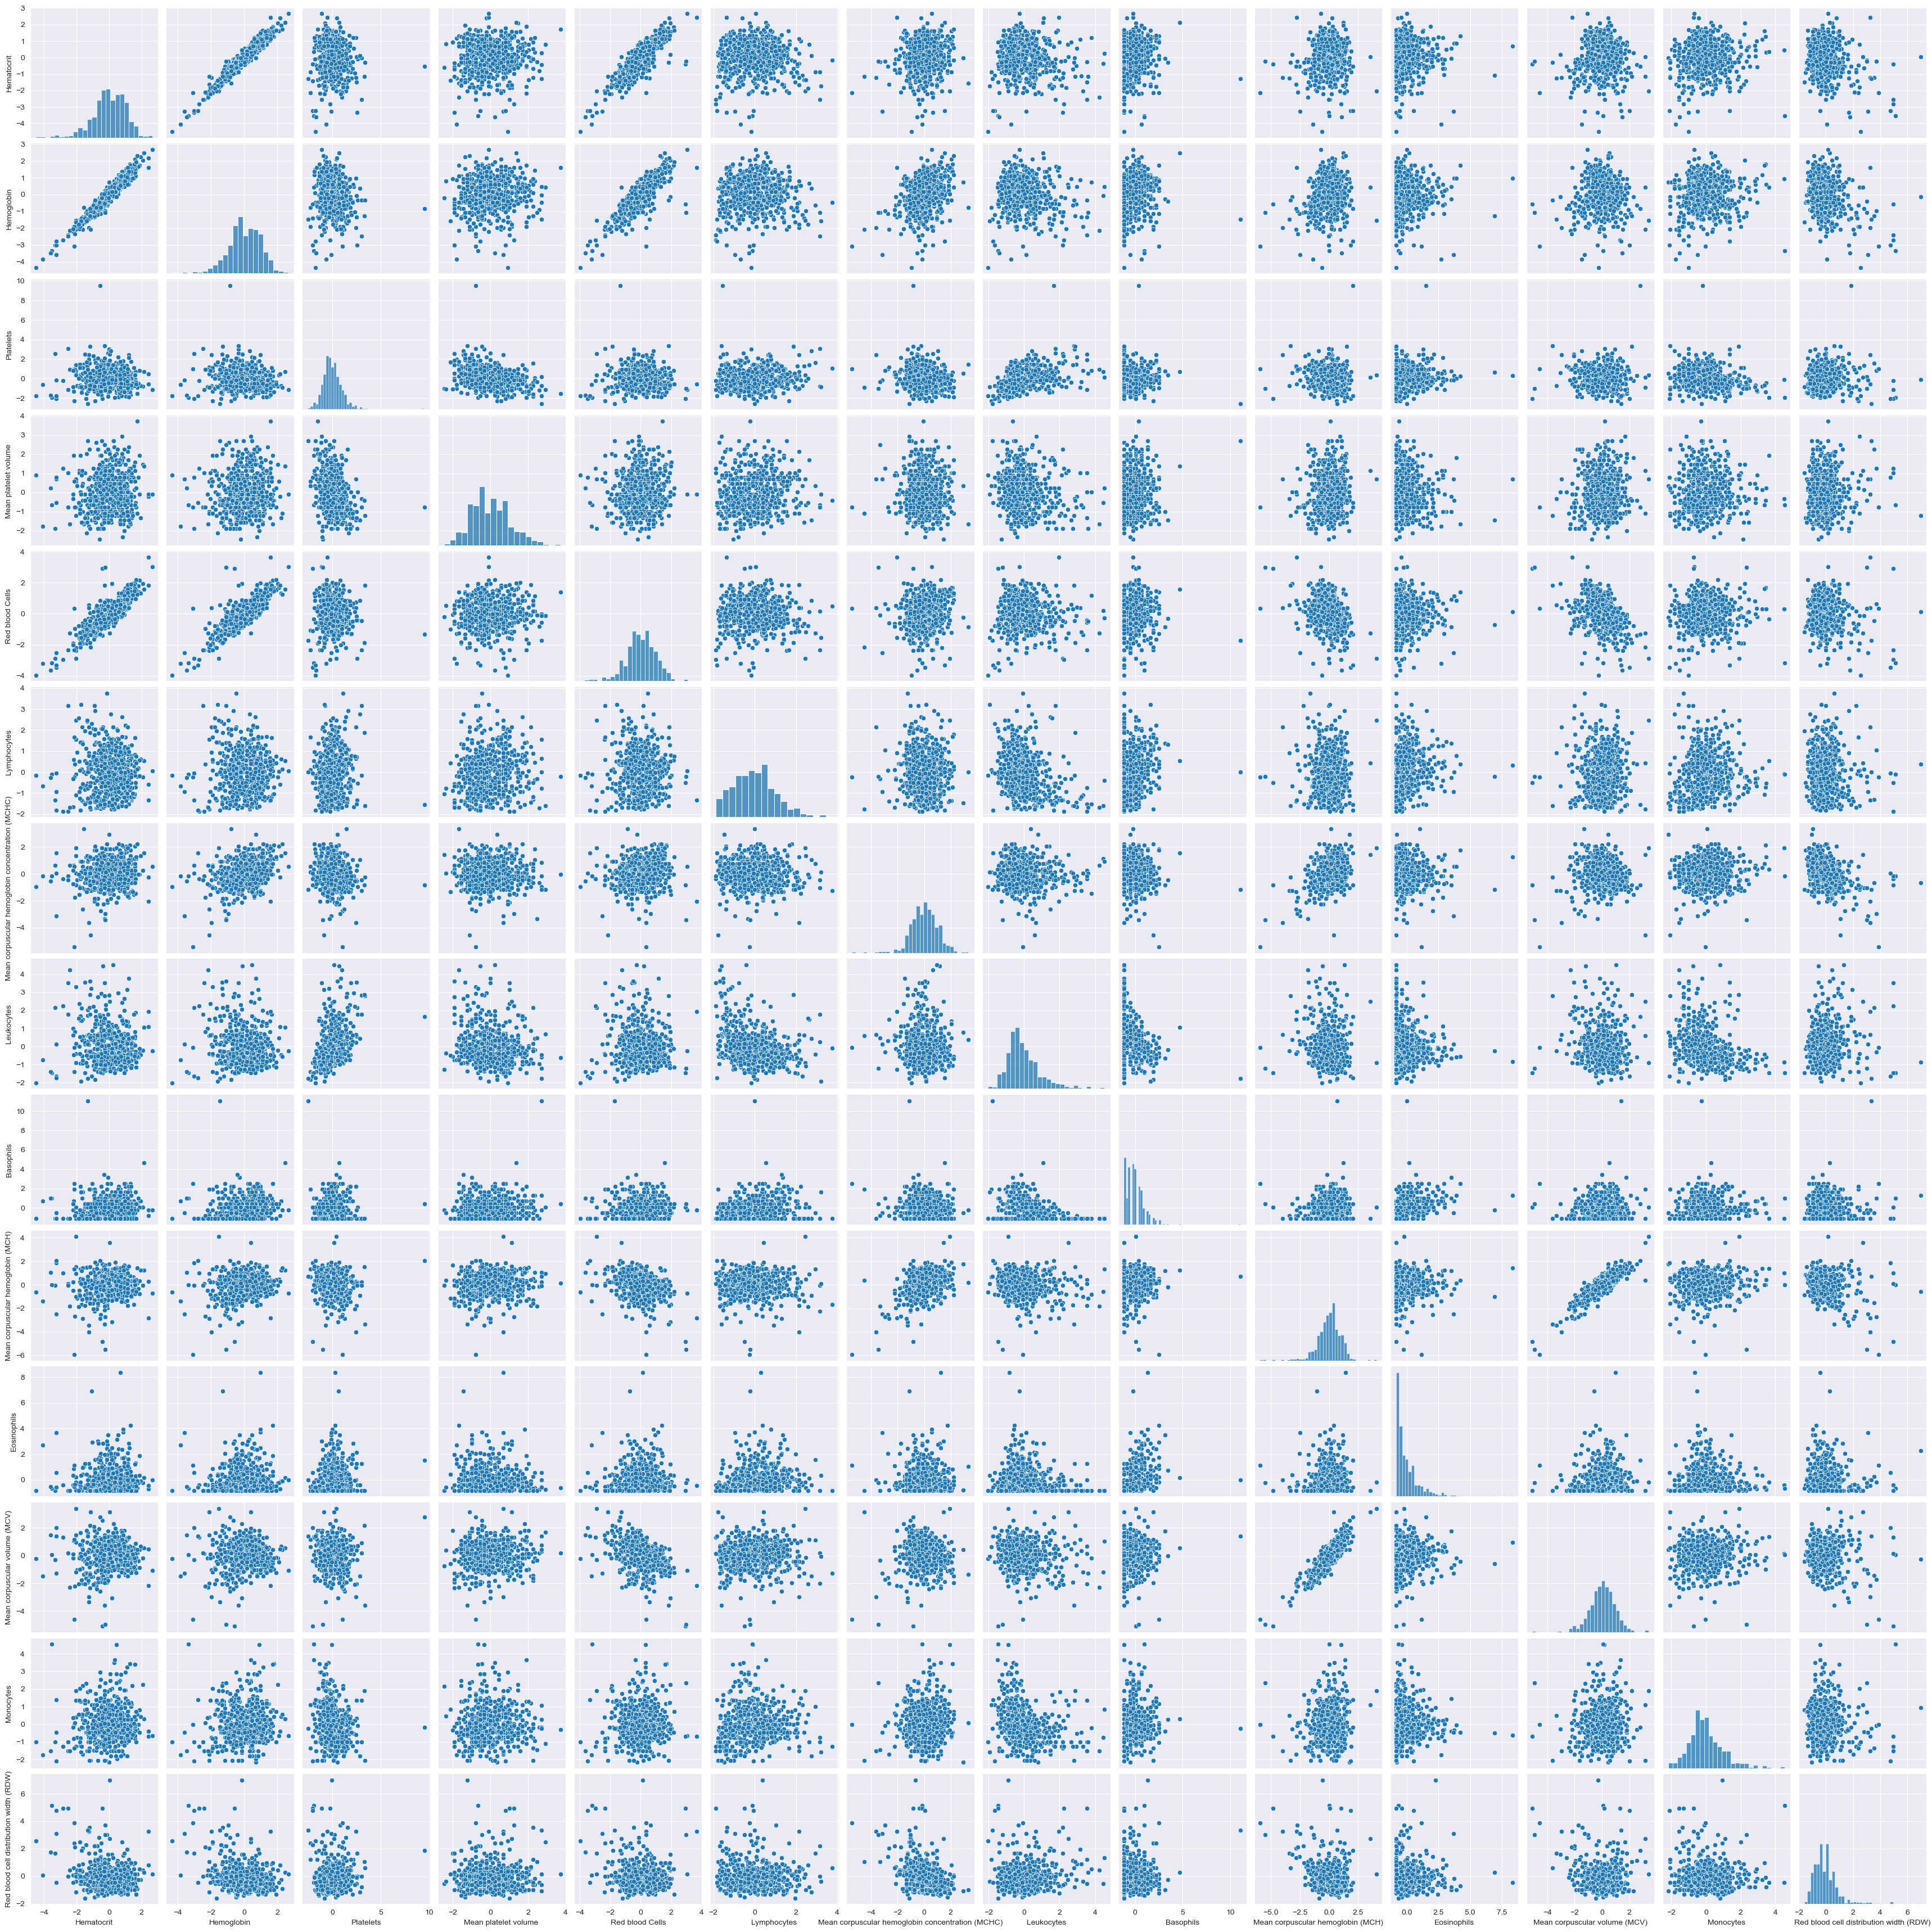

In [31]:
# Blood
sns.pairplot(df[blood_columns])

<Axes: >

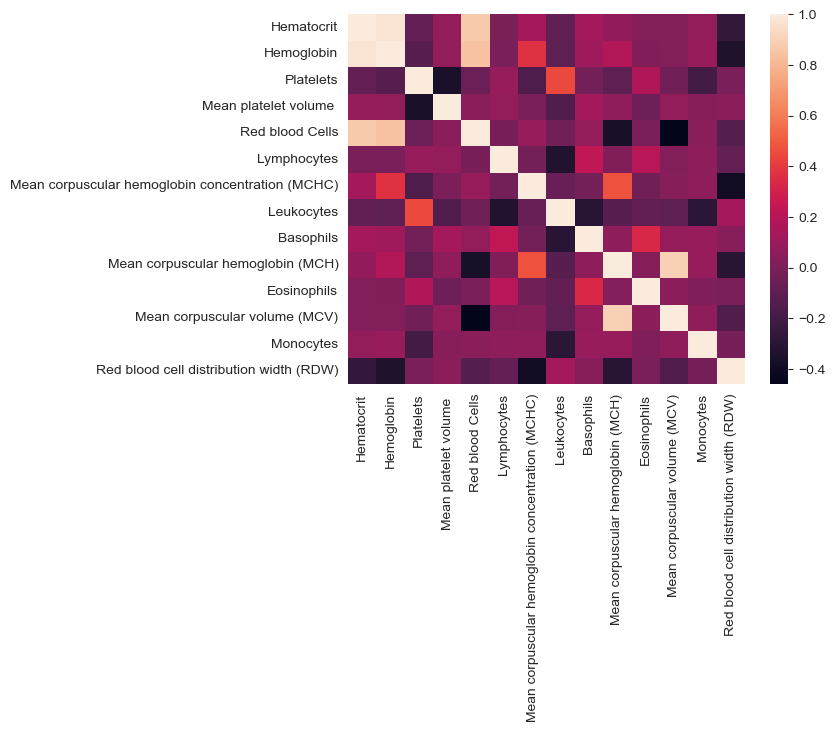

In [32]:
sns.heatmap(df[blood_columns].corr())

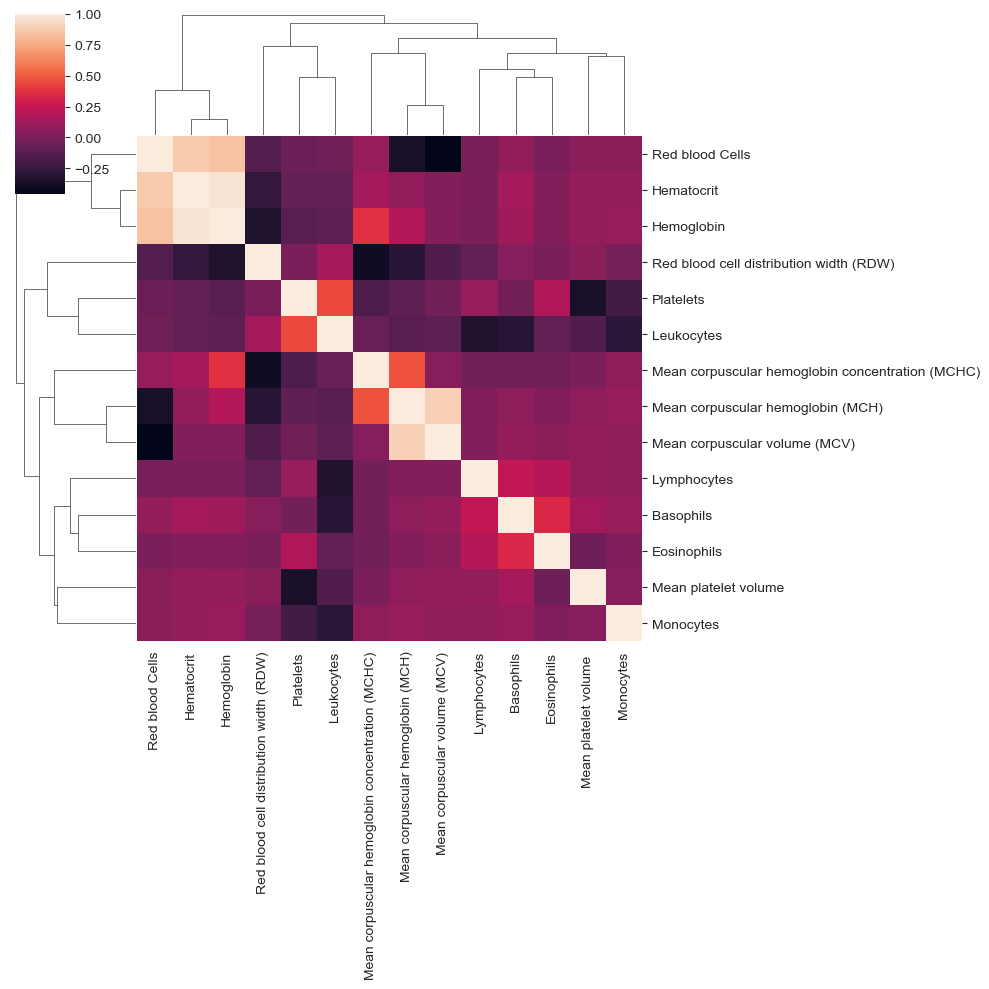

In [33]:
sns.clustermap(df[blood_columns].corr())

C:\Users\aitay\AppData\Local\Temp\ipykernel_33684\3583933145.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

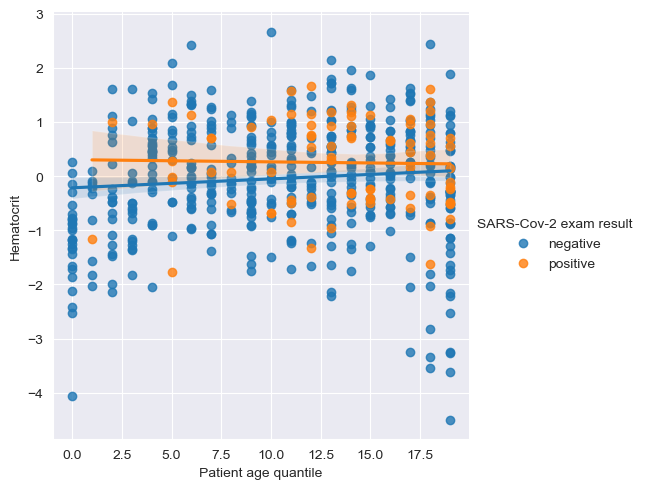

<Figure size 640x480 with 0 Axes>

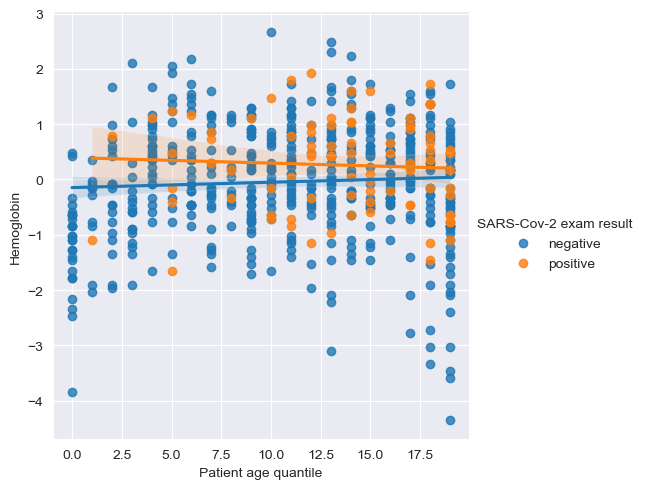

<Figure size 640x480 with 0 Axes>

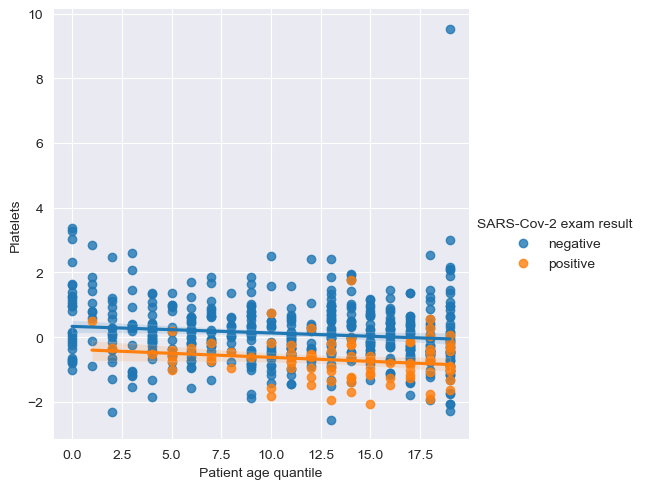

<Figure size 640x480 with 0 Axes>

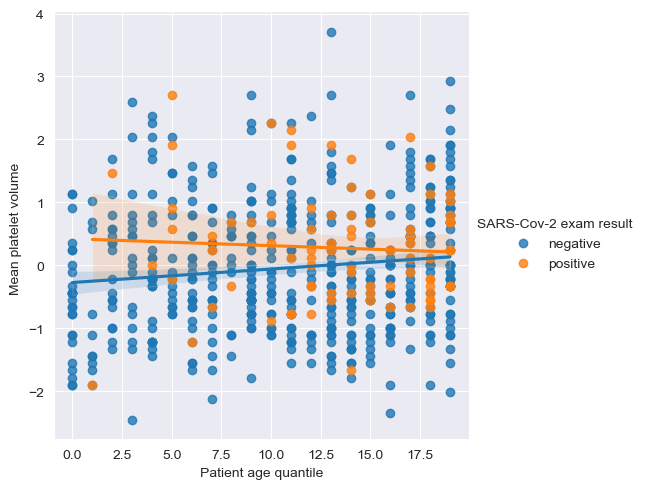

<Figure size 640x480 with 0 Axes>

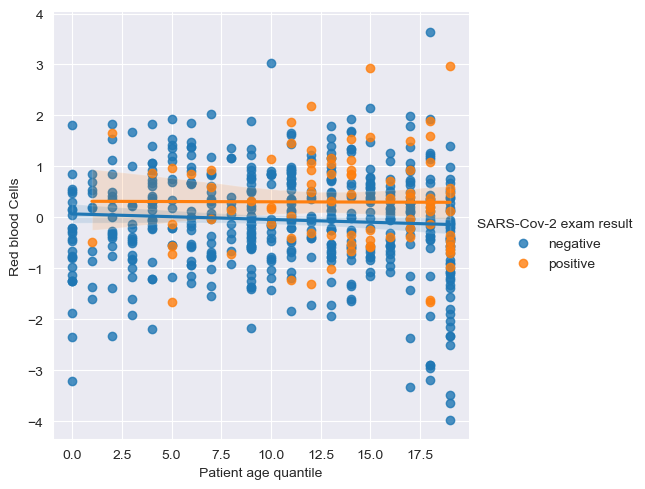

<Figure size 640x480 with 0 Axes>

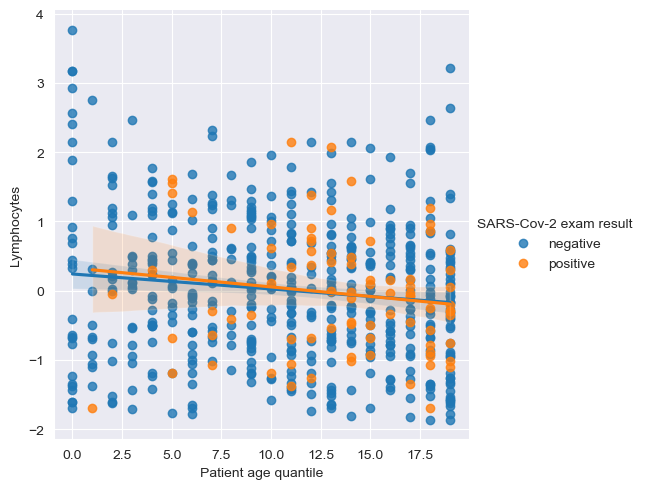

<Figure size 640x480 with 0 Axes>

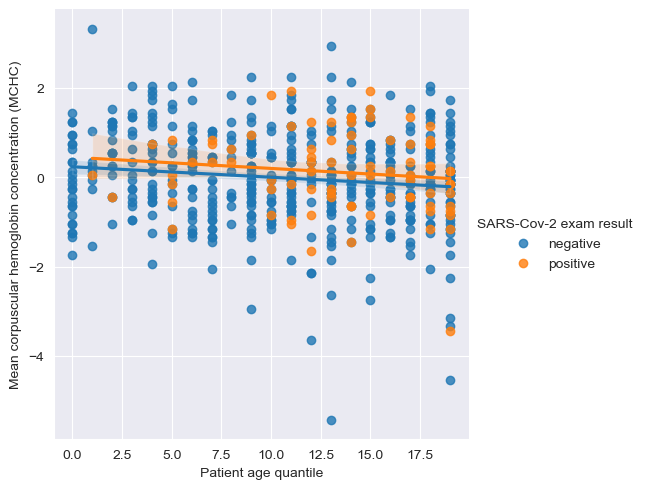

<Figure size 640x480 with 0 Axes>

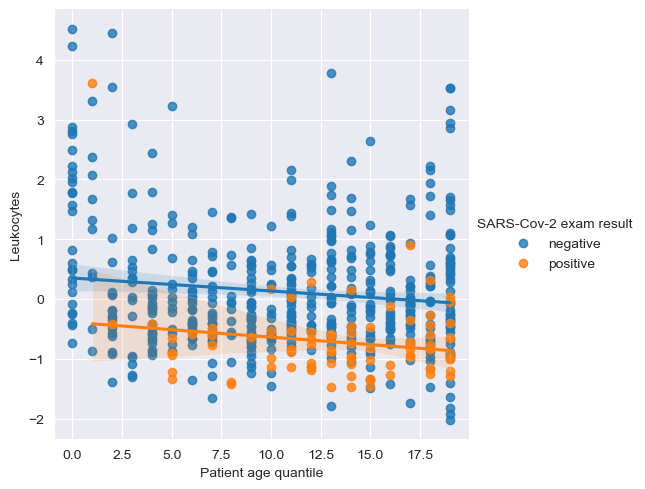

<Figure size 640x480 with 0 Axes>

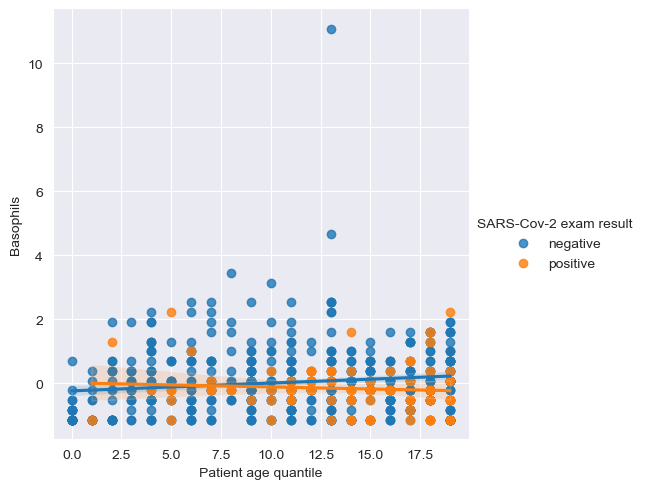

<Figure size 640x480 with 0 Axes>

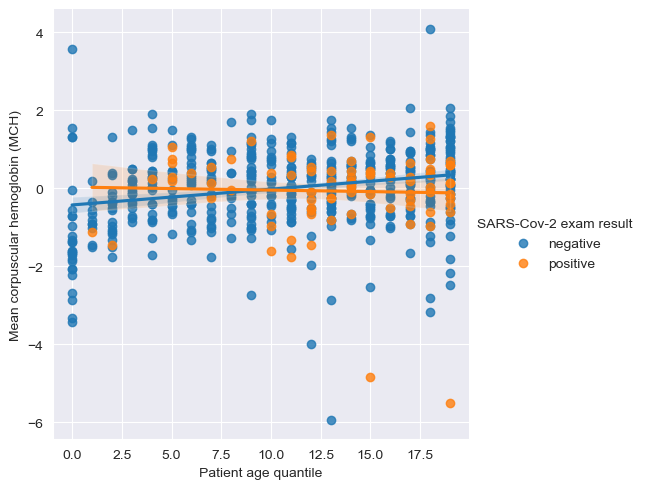

<Figure size 640x480 with 0 Axes>

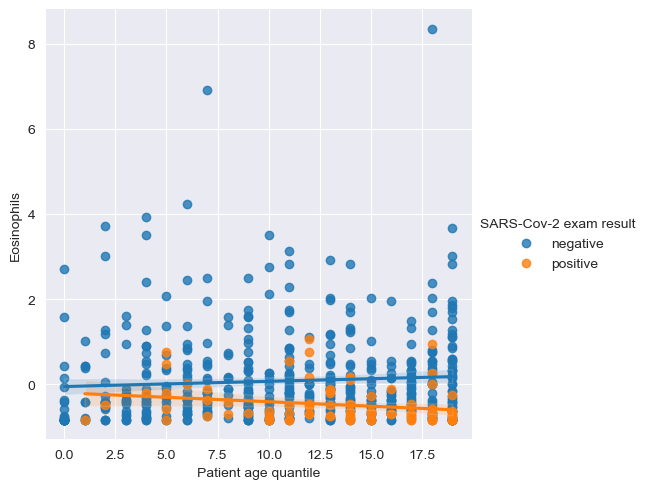

<Figure size 640x480 with 0 Axes>

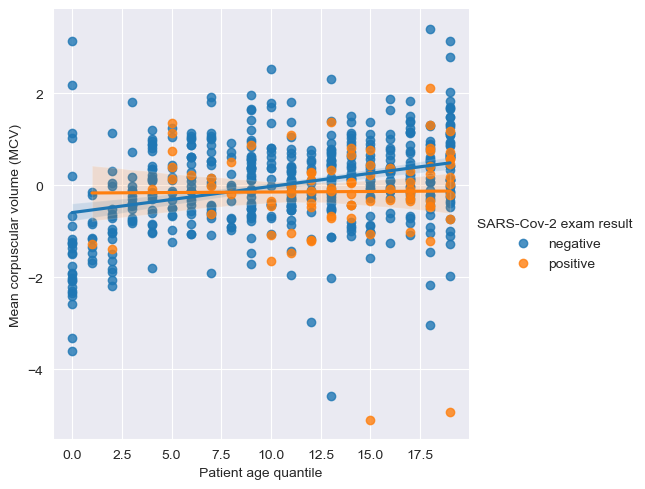

<Figure size 640x480 with 0 Axes>

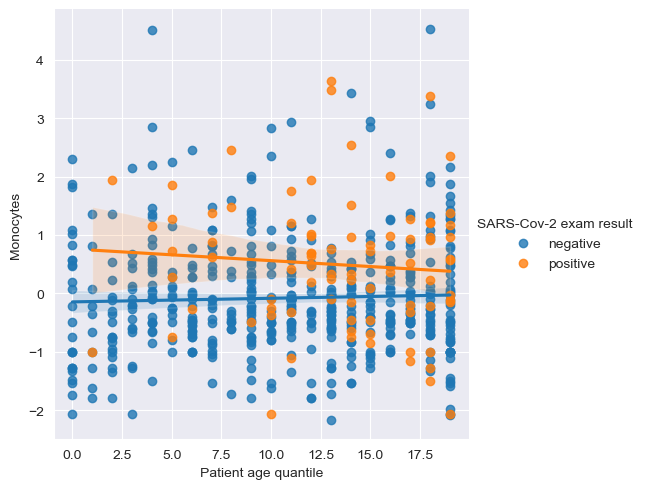

<Figure size 640x480 with 0 Axes>

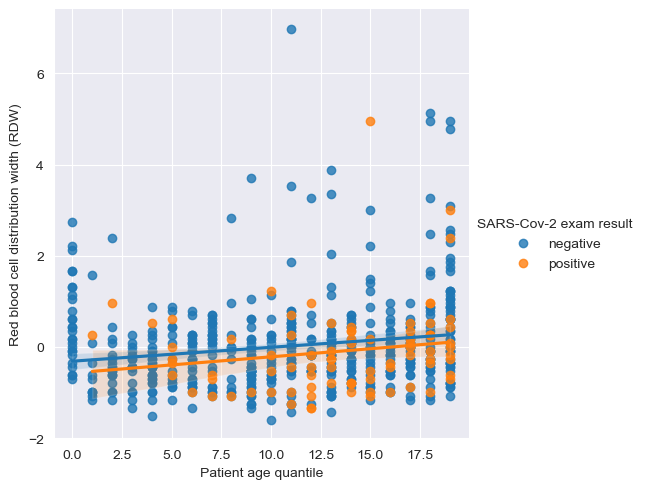

In [35]:
#Blood/age
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile',y=col, hue='SARS-Cov-2 exam result',data=df)

In [36]:
df.corr()['Patient age quantile'].sort_values()

C:\Users\aitay\AppData\Local\Temp\ipykernel_33684\476612201.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Patient age quantile'].sort_values()


Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [37]:
# Viral / viral
pd.crosstab(df['Influenza A'],df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [39]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

<Axes: >

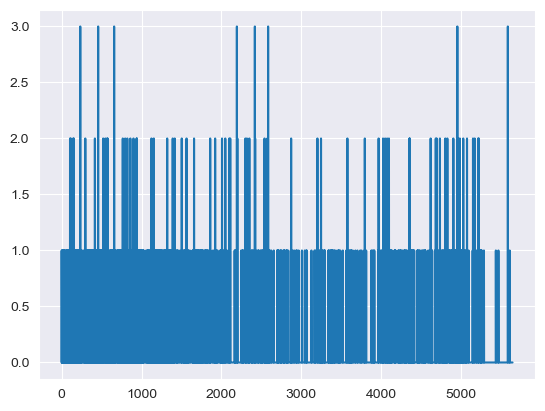

In [41]:
# Every patient how many positive tests he have
np.sum(df[viral_column[:-2]]=='detected',axis=1).plot()

In [45]:
# saving it in a variable
df['is sick']=np.sum(df[viral_column[:-2]]=='detected',axis=1)>=1

In [46]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test is sick  
0                      NaN                      NaN   False  
1                 negative                 negative    True  
2                      NaN                      NaN   False  
3                      NaN                      NaN   False  
4                      NaN                      NaN    True  

[5 rows x 39 columns]

In [47]:
sick_df=df[df['is sick']==True]
not_sick_df=df[df['is sick']==False]

C:\Users\aitay\AppData\Local\Temp\ipykernel_33684\3918188062.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sick_df[col],label='Sick', color='red', kde=True)
C:\Users\aitay\AppData\Local\Temp\ipykernel_33684\3918188062.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_sick_df[col],lab

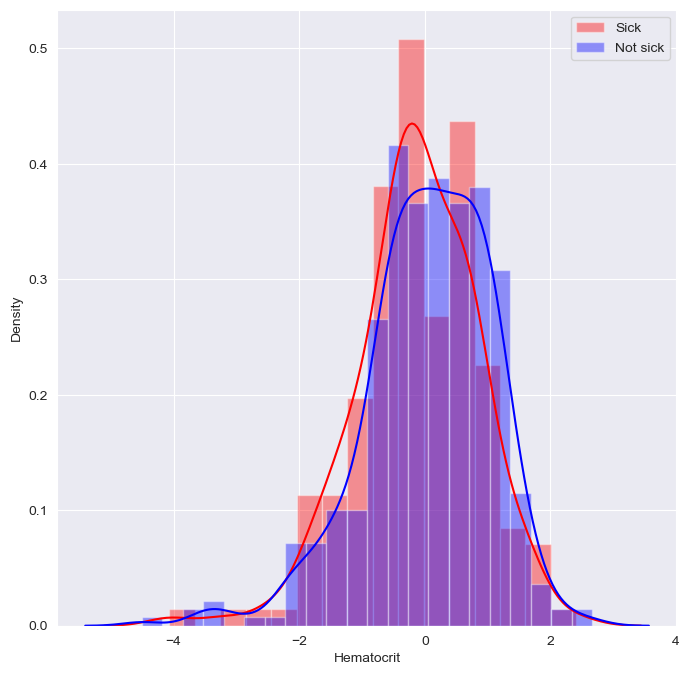

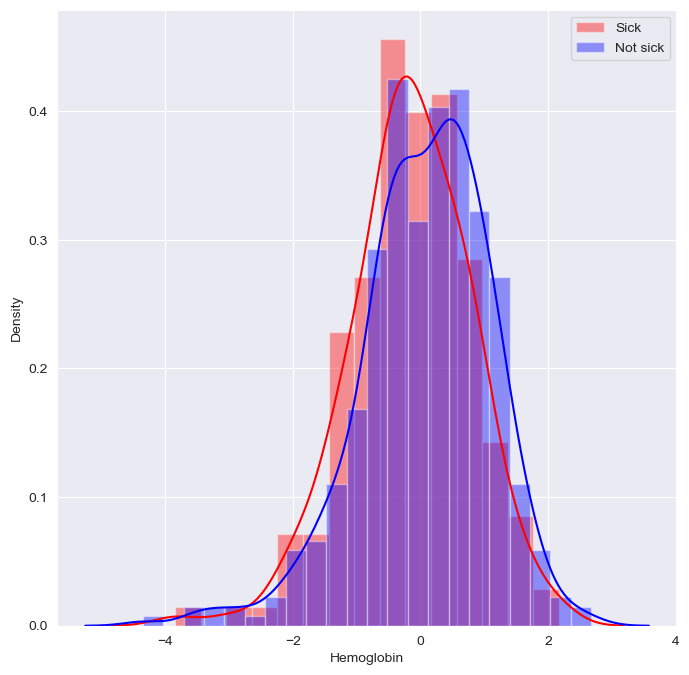

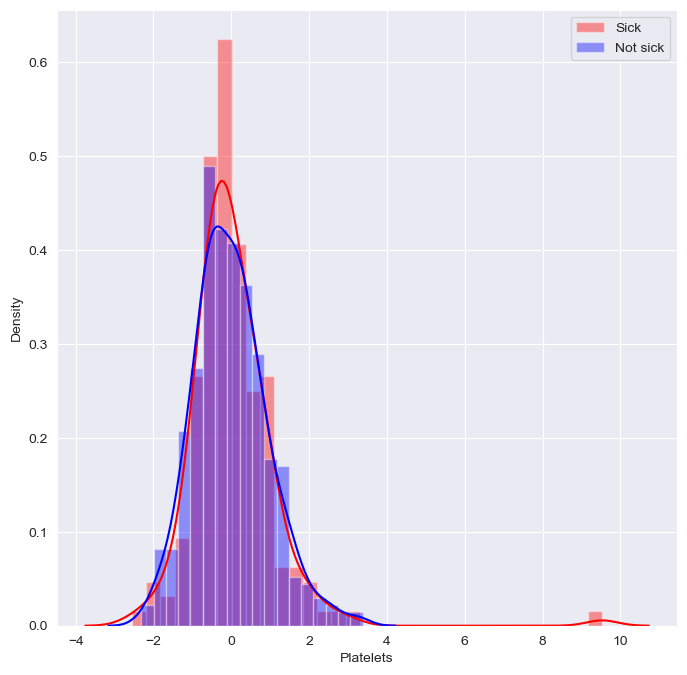

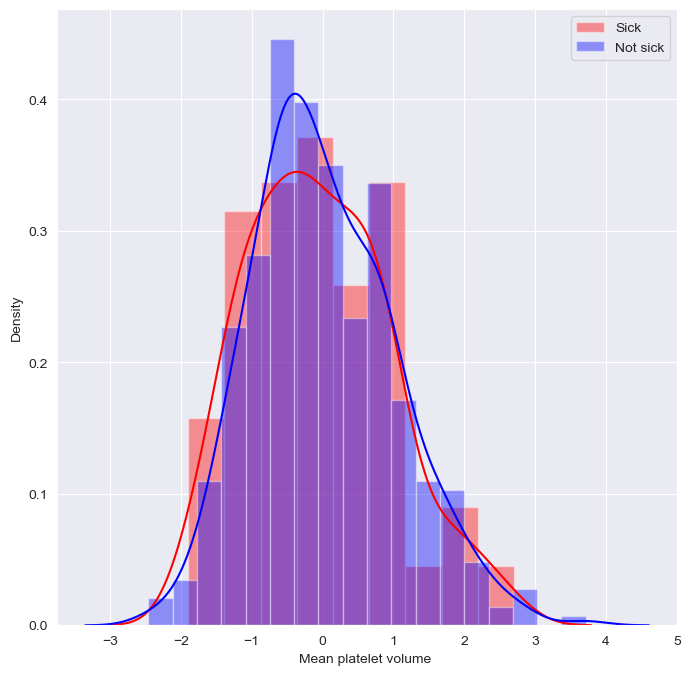

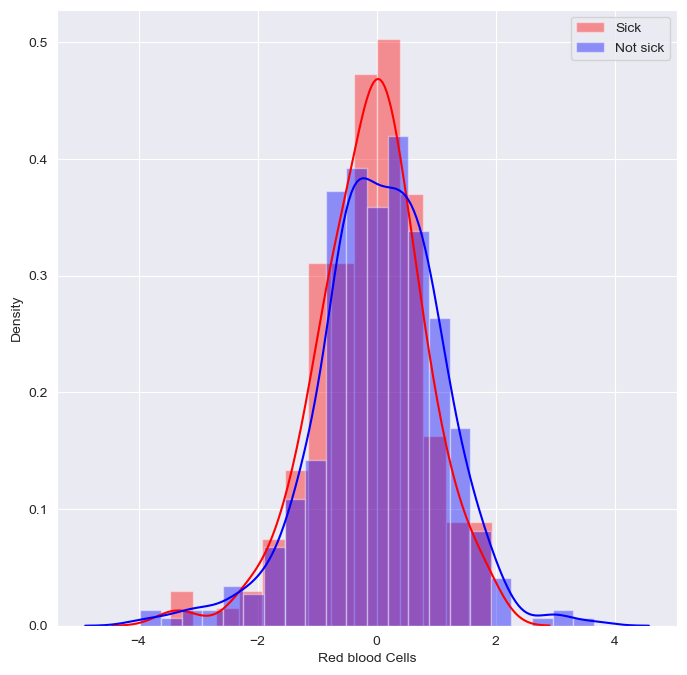

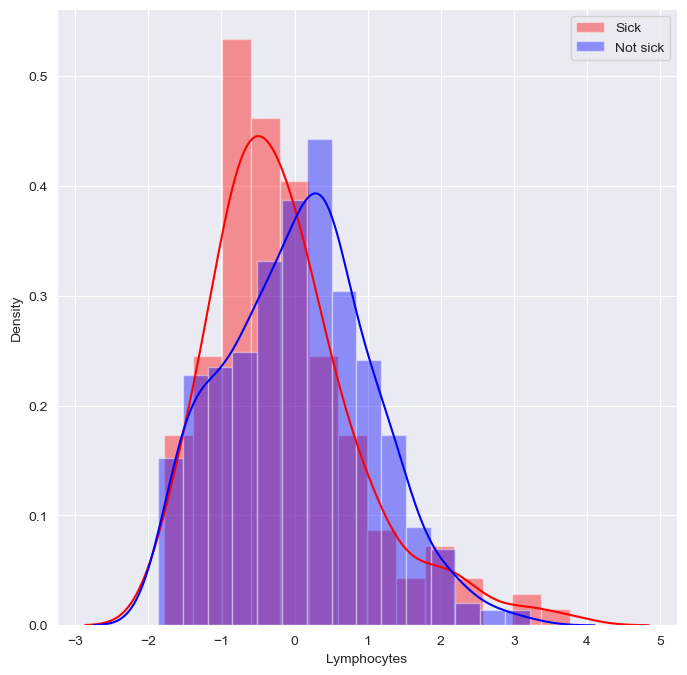

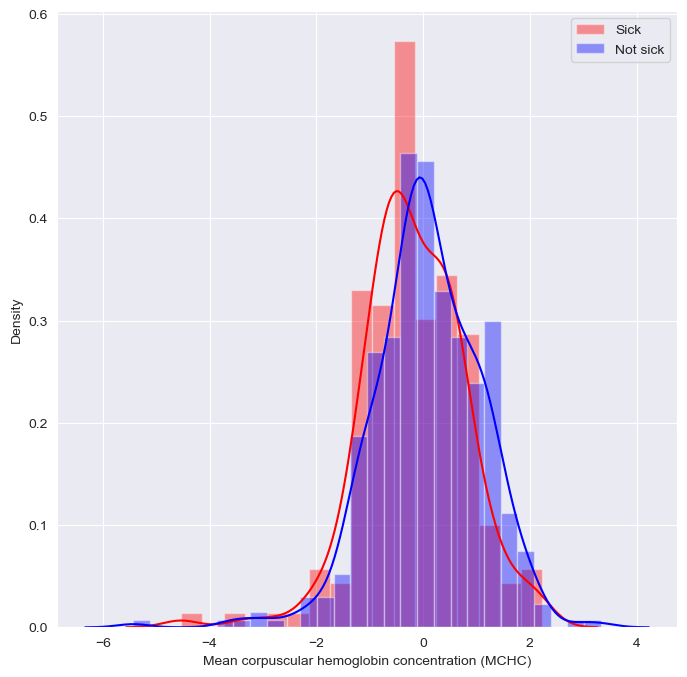

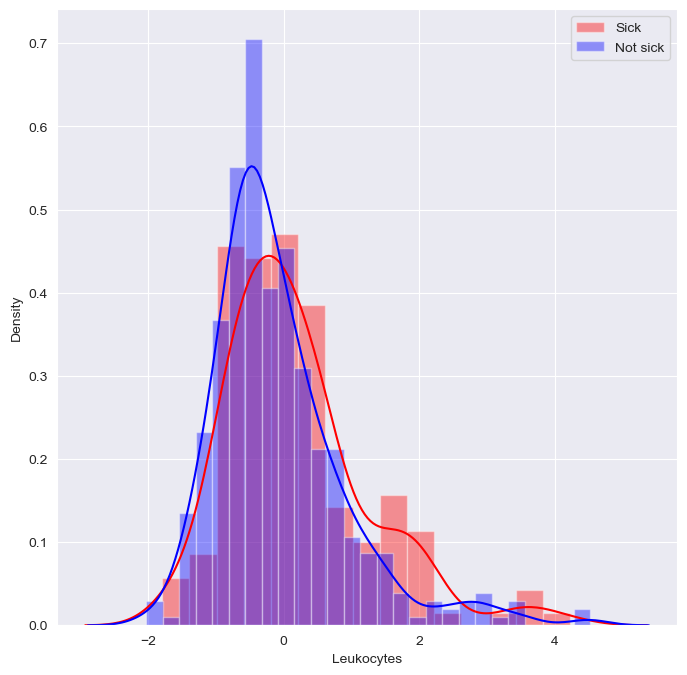

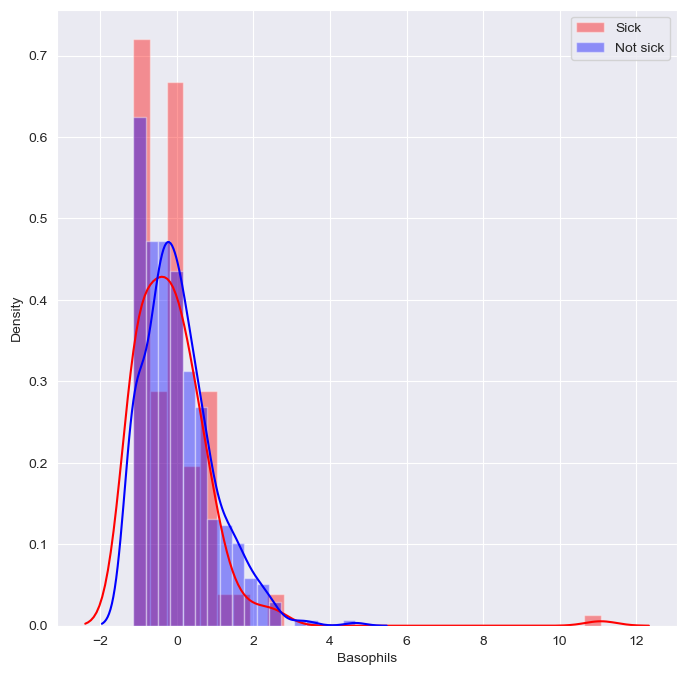

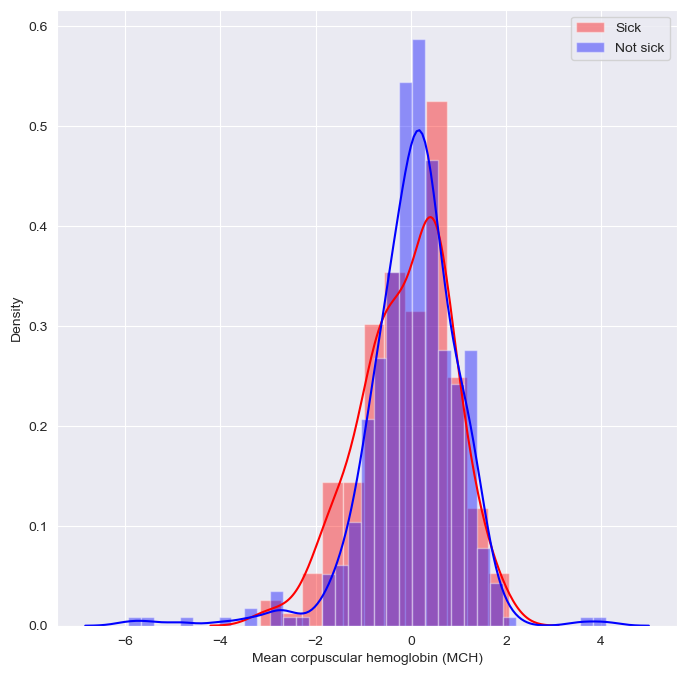

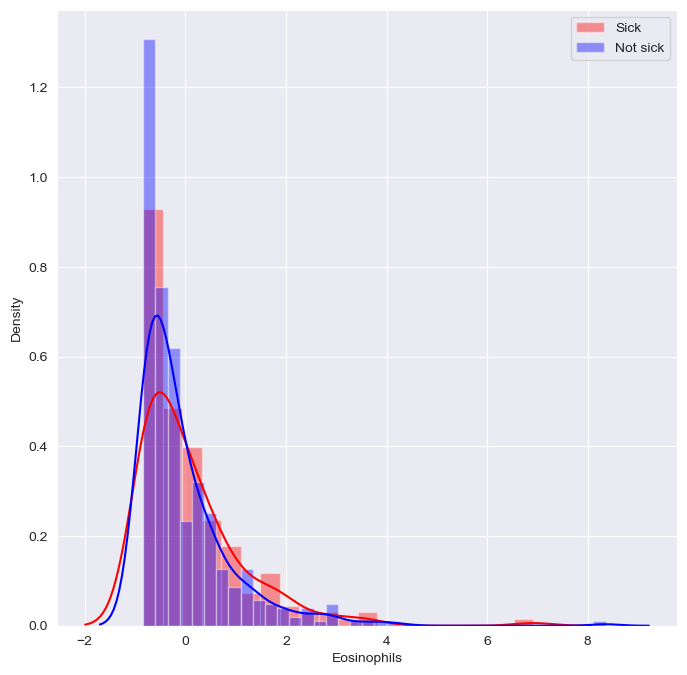

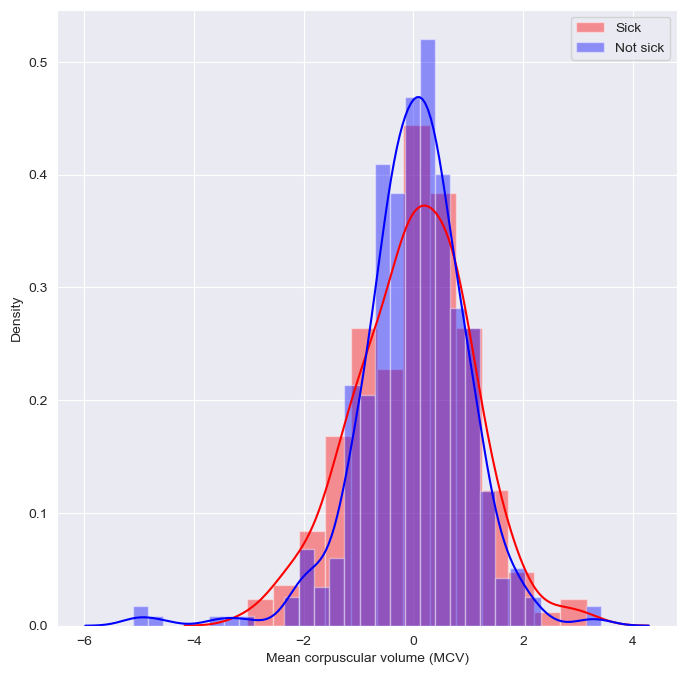

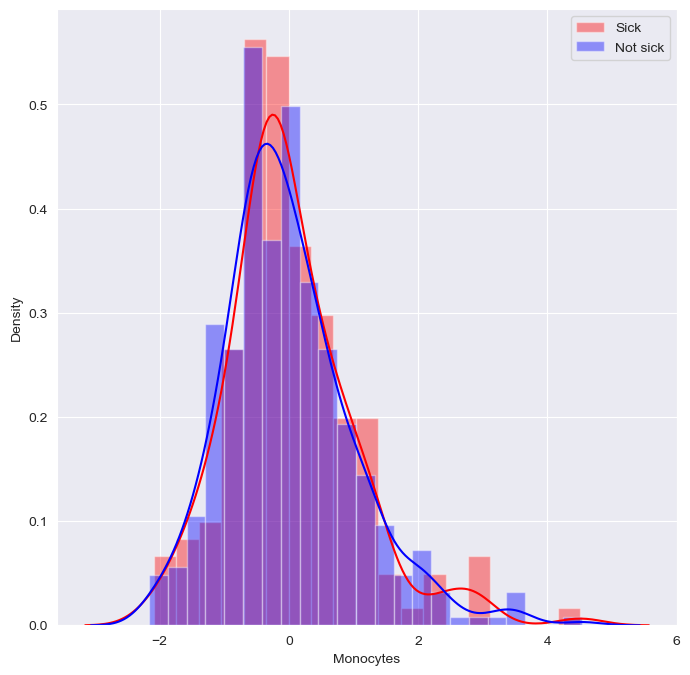

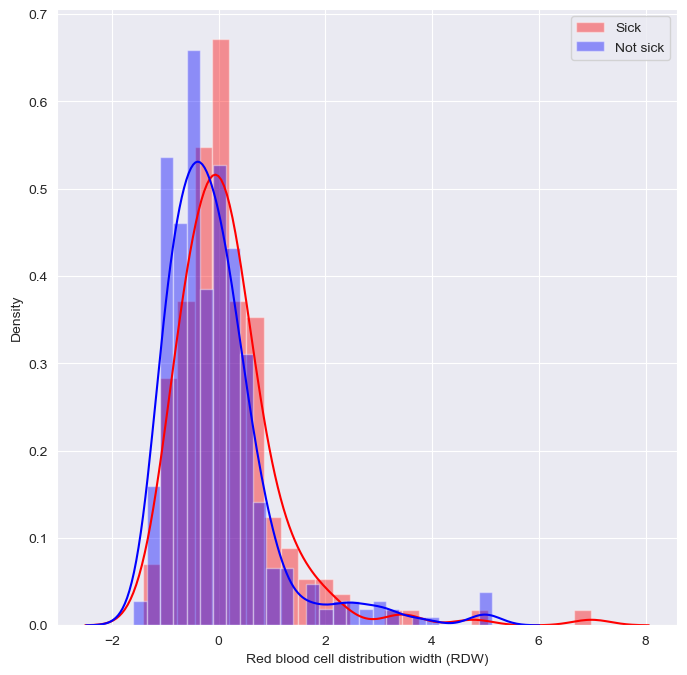

In [49]:
for col in blood_columns:
    plt.figure(figsize=(8,8))
    sns.distplot(sick_df[col],label='Sick', color='red', kde=True)
    sns.distplot(not_sick_df[col],label='Not sick',color='blue',kde=True)
    plt.legend()
plt.show()

In [52]:
# hospitalized/blood_data

def hospitalization(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'Regular'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1 :
        return 'Semi-intensive'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']==1 :
        return 'Intensive'
    else :
        return 'unknown'

In [53]:
df['status']=df.apply(hospitalization,axis=1)

In [57]:
df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0            NaN        NaN                    NaN              NaN  ...   
1      -0.022340  -0.517413               0.010677         0.102004  ...   
2            NaN        NaN                    NaN              NaN  ...   
3            NaN        NaN                    NaN              NaN  ...   
4            NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5640         NaN        NaN                    NaN              NaN  ...   
5641         NaN        NaN                    NaN              NaN  ...   
5642         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

      Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0                 NaN              NaN      

In [60]:
#Removing enoying warnings from seaborn
import warnings
warnings.filterwarnings('ignore')

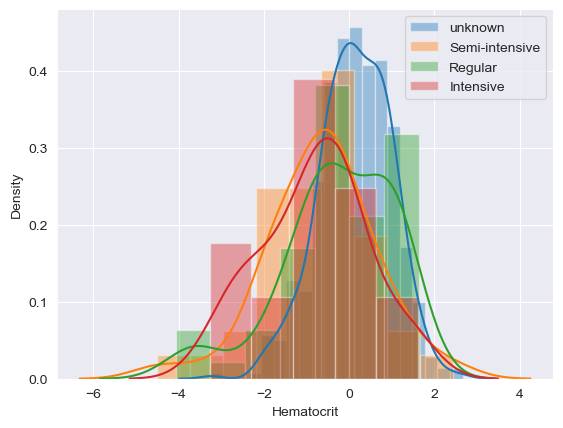

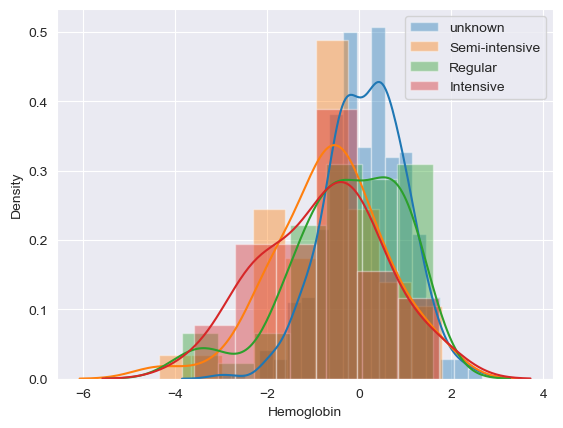

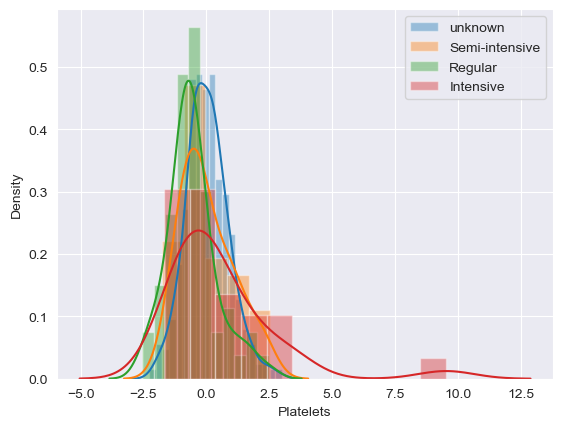

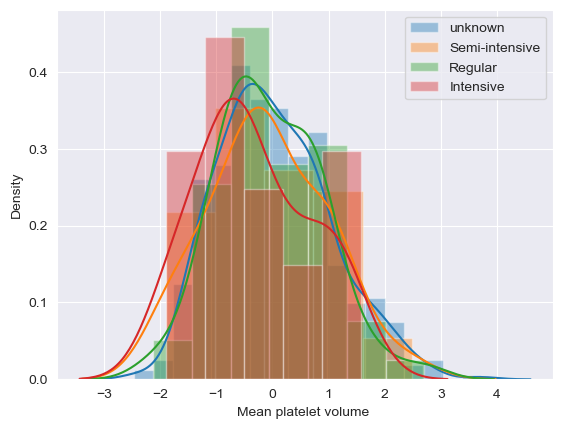

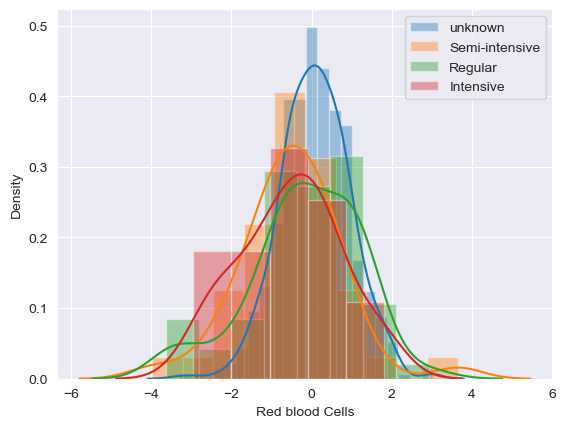

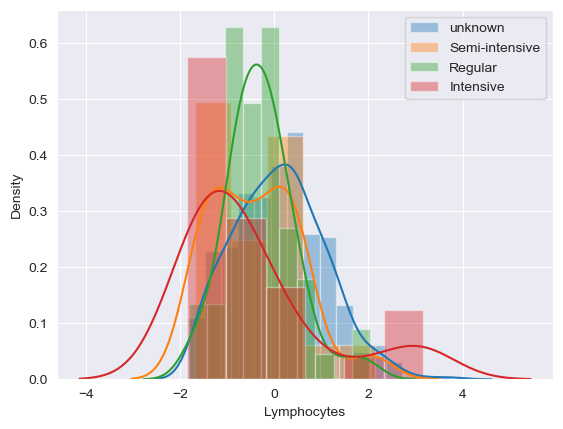

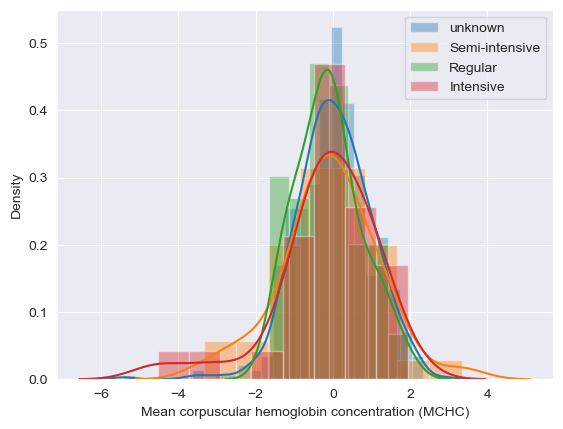

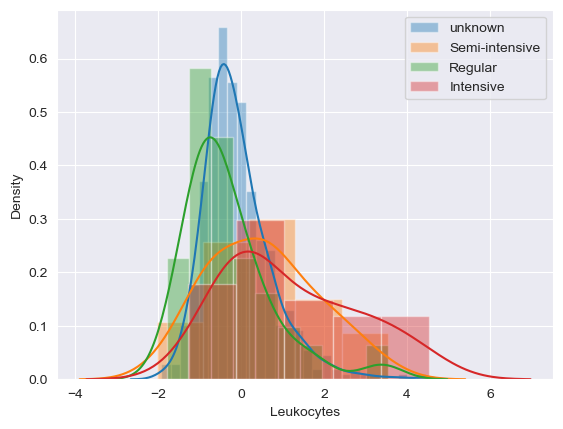

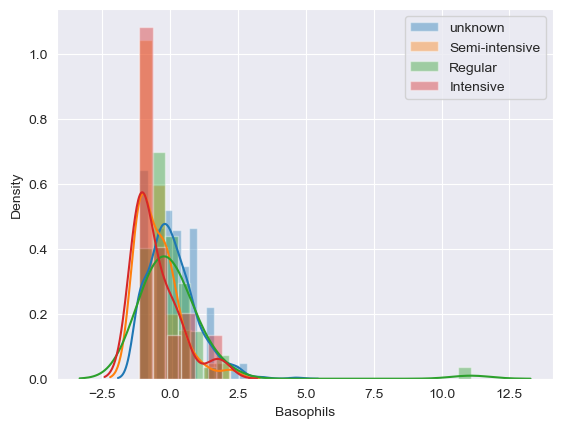

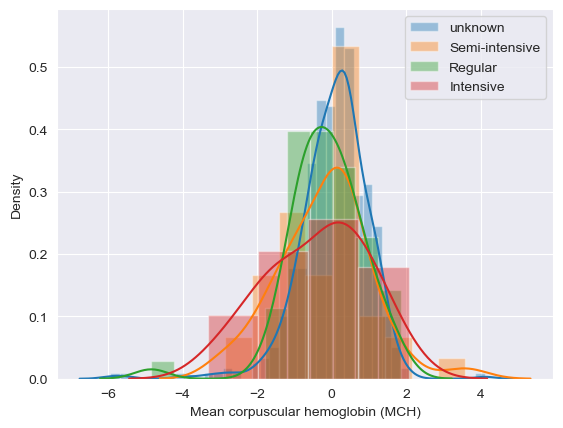

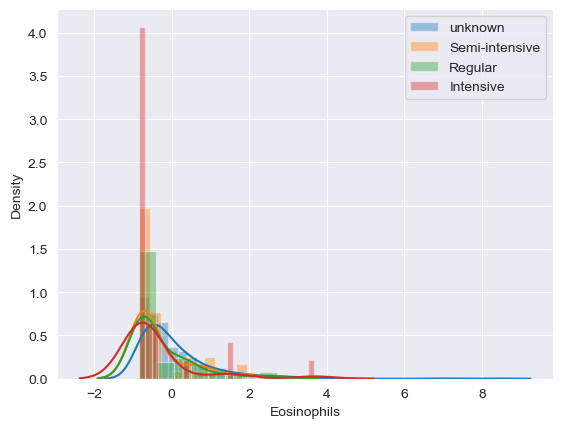

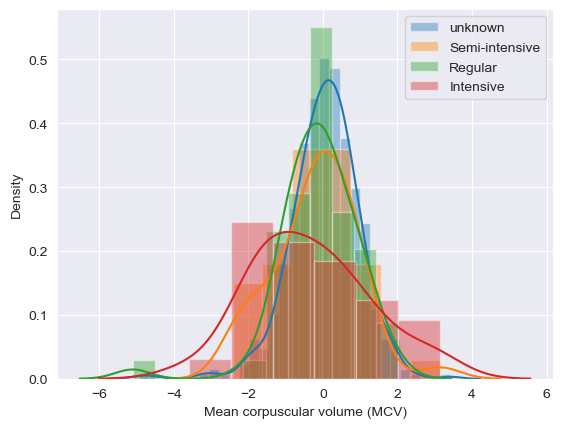

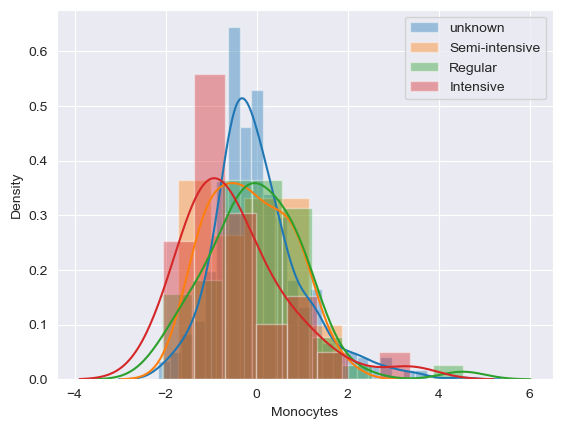

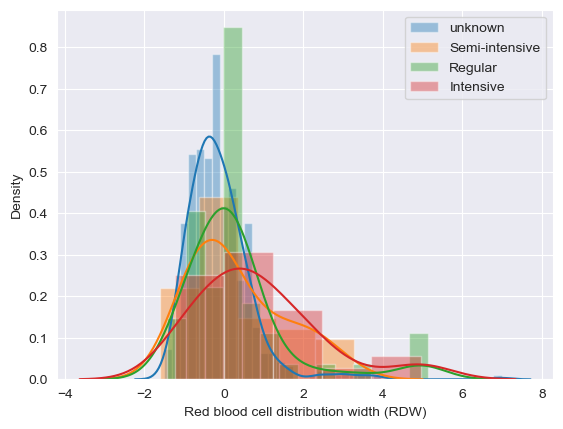

In [61]:
for col in blood_columns:
    plt.figure()
    for cat in df['status'].unique():
        sns.distplot(df[df['status']==cat][col],label=cat, kde=True)
    plt.legend()

NaN analysis

In [63]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [64]:
viral_column

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [65]:
# We are trying to understand what happens if we remove all NaN values
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [66]:
#if we use only blood data, we get around 600 value
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [67]:
# If we keep only viral value, we keep around values (1354)
df[viral_column].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [68]:
df1=df[viral_column[:-2]]
df1['covid']=df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [69]:
df2=df[blood_columns]
df2['covid']=df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)
#Here we have a better seperation of the values

negative    0.864548
positive    0.135452
Name: covid, dtype: float64

### STUDENT test

Definition :
Student Test is a statistical method that is used to determine whether there is a significant difference between the means of two groups which may be related in certain features.

In [70]:
### STUDENT tests
from scipy.stats import ttest_ind

In [71]:
positive_df.shape

(558, 38)

In [72]:
negative_df.shape

(5086, 38)

In [74]:
# We'll sample from thr negative_df
balanced_neg=negative_df.sample(positive_df.shape[0])

In [81]:
def t_test(col):
    alpha=0.02
    stat,p =ttest_ind(balanced_neg[col].dropna(),positive_df[col].dropna())
    if p < alpha:
        return 'H0 rejected'
    else:
        return 0

In [82]:
for col in blood_columns:
    print(f'{col:-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 rejected
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejected
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejected
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejected
Red blood cell distribution width (RDW)----------- 0


In [ ]:
# H0 = Patients having any form of virus HAVE THE SAME amount of Leukocytes, Monocytes, Platelets